<div class="alert alert-block alert-info">
<h1> Analyse MTBLS1295 peak table</h1>
</div>

- [0 - Import modules](#0---Import-modules)
- [0 - Import data](#0---Import-data)
- [1 - Preprocess data](#1---Preprocess-data)
  - [a - Transform data to adapt with input requirements](#a---Transform-data-to-adapt-with-input-requirements)
- [2 - Explore data](#2---Explore-data)
  - [a - Feature types](#a---Feature-types)
  - [b - Missing values exploration](#b---Missing-values-exploration)
  - [c - Correlation between features](#c---Correlation-between-features)
  - [d - Remove strongly correlated features (to potentially avoid issues during further analysis)](#d---Remove-strongly-correlated-features-(to-potentially-avoid-issues-during-further-analysis))
  - [e - PCA](#e---PCA)
  - [f - Target visualisation](#f---Target-visualisation)
  - [g - Feature visualisation](#g---Feature-visualisation)
- [2 - Impute missing values](#2---Impute-missing-values)
  - [a - Impute intensities with 1's](#a---Impute-intensities-with-1's)
  - [b - Impute intensities with half minimum value in features](#b---Impute-intensities-with-half-minimum-value-in-features)
- [3 - Transformations](#3---Transformations)
  - [a - log transformation](#a---log-transformation)
  - [b - Standard scale intensities](#b---Standard-scale-intensities)
- [4 - Dimensionality reduction](#4---Dimensionality-reduction)
  - [a - PCA then t-SNE](#a---PCA-then-t-SNE)
  - [b - Feature selection keeping all features with ANOVA pvalue $\lt \alpha \hspace{0.39cm}$](#b---Feature-selection-keeping-all-features-with-ANOVA-pvalue-$\lt-\alpha-\hspace{0.39cm}$)
  - [c - Feature selection keeping a specific number of features](#c---Feature-selection-keeping-a-specific-number-of-features)
- [5 - Classification](#5---Classification)
  - [a - Launch pipeline with differently preprocessed dataframes](#a---Launch-pipeline-with-differently-preprocessed-dataframes)
- [6 - Clustering](#6---Clustering)
  - [a - Kmeans](#a---Kmeans)
  - [b - Affinity propagation](#b---Affinity-propagation)
  - [c - Hierarchical clustering](#c---Hierarchical-clustering)

# 0 - Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

In [198]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/', '', pwd[0])
pwd = '/'.join(pwd.split('/')[:-1]) + '/'
print(f'Working directory : {pwd}')

python_version = ! python --version
print(f'Python version : {python_version[0]}')

Working directory : /home/jovyan/work/
Python version : Python 3.10.4


In [3]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"figure.figsize": (15,8), "axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 15, 8

sns.set_theme(style="darkgrid")

In [4]:
import sys
sys.path.append(pwd + 'bin/')

# 0 - Import data

## Below are all the peak tables each batch of the MLBLS19 dataset

In [6]:
peakTable_init = pd.read_excel(pwd + 'data/MTBLS1295/BileAcid.xlsx')
print(f'Peak table shape : {peakTable_init.shape}')
peakTable_init.head()

Peak table shape : (96, 54)


unit: nmol/g Category    primary  primary.1  primary.2    primary.3  \
0       sample      BAs      a-MCA        ACA      b-MCA           CA   
1       HCL-11       HC   0.473369  28.321693  39.173192  1310.431746   
2        HCL-9       HC  59.614194  57.979355  26.272258      3348.52   
3       HCL-10       HC   8.676522    6.44087   1.528696   404.870435   
4        HCL-1       HC   2.984348  21.568696   8.652754  1341.371594   

    primary.4  primary.5 primary conjugated primary conjugated.1  ...  \
0        CDCA        HCA                GCA                GCDCA  ...   
1  121.319929  18.143915          50.288536             5.322751  ...   
2  245.130323  59.877419              21.92             1.776774  ...   
3       90.94   10.99913           0.324348             0.436522  ...   
4  389.247536  10.369855           4.687536             1.503768  ...   

  secondary conjugated.12 Unnamed: 45 Unnamed: 46 Unnamed: 47 Unnamed: 48  \
0                   TUDCA     CA:CDCA      DCA:CA     GDCA:CA     TDCA:CA   
1               83.363668   10.801455    0.127721           0    0.000046   
2                0.682581   13.660162    0.091134    0.000015    0.000012   
3                0.275652    4.452061    0.287106           0    0.000017   
4                0.038261    3.446063    0.000717    0.000015    0.000027   

  Unnamed: 49 Unnamed: 50 Unnamed: 51 Unnamed: 52 Unnamed: 53  
0    LCA:CDCA   GLCA:CDCA   TLCA:CDCA    GDCA:DCA    TDCA:DCA  
1    0.004605    0.000151    0.000023           0    0.000358  
2    0.000342    0.000153    0.000179    0.000161    0.000131  
3     0.02664    0.000115    0.000096           0     0.00006  
4    0.000298    0.000057           0    0.020507    0.037394  

[5 rows x 54 columns]

In [7]:
all_metadata = pd.read_csv(pwd + 'data/MTBLS1295/s_MTBLS1295.txt', sep='\t')
print(f'Metadata shape : {all_metadata.shape}')
all_metadata.head()

Metadata shape : (96, 15)


Source Name Characteristics[Organism] Term Source REF  \
0       CH-01              Homo sapiens       NCBITAXON   
1       CH-02              Homo sapiens       NCBITAXON   
2       CH-03              Homo sapiens       NCBITAXON   
3       CH-04              Homo sapiens       NCBITAXON   
4       CH-05              Homo sapiens       NCBITAXON   

                               Term Accession Number  \
0  http://purl.bioontology.org/ontology/NCBITAXON...   
1  http://purl.bioontology.org/ontology/NCBITAXON...   
2  http://purl.bioontology.org/ontology/NCBITAXON...   
3  http://purl.bioontology.org/ontology/NCBITAXON...   
4  http://purl.bioontology.org/ontology/NCBITAXON...   

  Characteristics[Organism part] Term Source REF.1  \
0                          Feces              NCIT   
1                          Feces              NCIT   
2                          Feces              NCIT   
3                          Feces              NCIT   
4                          Feces              NCIT   

                      Term Accession Number.1      Factor Value[Disease]  \
0  http://purl.obolibrary.org/obo/NCIT_C13234                Cholestasis   
1  http://purl.obolibrary.org/obo/NCIT_C13234                Cholestasis   
2  http://purl.obolibrary.org/obo/NCIT_C13234  Impaired hepatic function   
3  http://purl.obolibrary.org/obo/NCIT_C13234                Cholestasis   
4  http://purl.obolibrary.org/obo/NCIT_C13234                Cholestasis   

  Term Source REF.2                            Term Accession Number.2  \
0              DOID          http://purl.obolibrary.org/obo/DOID_13580   
1              DOID          http://purl.obolibrary.org/obo/DOID_13580   
2             MTBLS  http://www.ebi.ac.uk/metabolights/ontology/pla...   
3              DOID          http://purl.obolibrary.org/obo/DOID_13580   
4              DOID          http://purl.obolibrary.org/obo/DOID_13580   

        Protocol REF Sample Name Factor Value[BioSamples accession]  \
0  Sample collection       CH-01                       SAMEA5815372   
1  Sample collection       CH-02                       SAMEA5815369   
2  Sample collection       CH-03                       SAMEA5815317   
3  Sample collection       CH-04                       SAMEA5815371   
4  Sample collection       CH-05                       SAMEA5815367   

   Term Source REF.3  Term Accession Number.3  
0                NaN                      NaN  
1                NaN                      NaN  
2                NaN                      NaN  
3                NaN                      NaN  
4                NaN                      NaN

### Below we will keep onky useful metadata

# 1 - Preprocess data

In [8]:
from explore_data_functions import *

## a - Transform data to adapt with input requirements

In [121]:
peakTable = peakTable_init.copy()
peakTable.columns = peakTable.iloc[0, :]
peakTable = peakTable.drop(0, axis=0)
peakTable.index = range(peakTable.shape[0])
peakTable

0    sample BAs a-MCA   ACA b-MCA      CA   CDCA   HCA   GCA GCDCA  ... TUDCA  \
0    HCL-11  HC  0.47 28.32 39.17 1310.43 121.32 18.14 50.29  5.32  ... 83.36   
1     HCL-9  HC 59.61 57.98 26.27 3348.52 245.13 59.88 21.92  1.78  ...  0.68   
2    HCL-10  HC  8.68  6.44  1.53  404.87  90.94 11.00  0.32  0.44  ...  0.28   
3     HCL-1  HC  2.98 21.57  8.65 1341.37 389.25 10.37  4.69  1.50  ...  0.04   
4    HCL-12  HC 15.83  4.01  7.78  319.58  35.89 15.34  0.44  0.31  ...  0.04   
..      ...  ..   ...   ...   ...     ...    ...   ...   ...   ...  ...   ...   
90    CH-88  CJ  0.47  0.54  0.03   15.68  12.36  0.40  0.00  0.05  ...  0.01   
91    CH-92  CJ  0.12  0.76  0.04   96.98  54.88  1.23  0.01  0.01  ...  0.00   
92    CH-89  CJ  3.07  0.42  0.04   46.44  62.85  0.42  0.89  3.51  ...  0.04   
93  CH-95-1  CJ  5.37  0.88  1.59  293.05 129.83  2.94  0.57  0.95  ...  5.58   
94    CH-54  CJ  0.02  0.08  0.04   26.94  13.25  0.23  0.25  1.54  ...     0   

0  CA:CDCA DCA:CA GDCA:CA TDCA:CA LCA:CDCA GLCA:CDCA TLCA:CDCA GDCA:DCA  \
0    10.80   0.13       0    0.00     0.00      0.00      0.00        0   
1    13.66   0.09    0.00    0.00     0.00      0.00      0.00     0.00   
2     4.45   0.29       0    0.00     0.03      0.00      0.00        0   
3     3.45   0.00    0.00    0.00     0.00      0.00         0     0.02   
4     8.90   0.14       0    0.00     0.04      0.00         0        0   
..     ...    ...     ...     ...      ...       ...       ...      ...   
90    1.27   0.85    0.00    0.00     0.03      0.00         0     0.00   
91    1.77   0.63    0.00    0.00     0.00      0.00         0     0.00   
92    0.74   1.55    0.00    0.00     0.00      0.00      0.00     0.00   
93    2.26   0.51    0.00    0.01     0.00      0.00      0.00     0.00   
94    2.03   0.58    0.00    0.00        0      0.00         0     0.00   

0  TDCA:DCA  
0      0.00  
1      0.00  
2      0.00  
3      0.04  
4      0.00  
..      ...  
90     0.00  
91     0.00  
92     0.00  
93     0.03  
94     0.00  

[95 rows x 54 columns]

In [122]:
all_metadata_subset = all_metadata[all_metadata['Source Name'].isin(peakTable['sample'])]
print(f'Metadata shape : {all_metadata_subset.shape}')
all_metadata_subset.head()

Metadata shape : (95, 15)


Source Name Characteristics[Organism] Term Source REF  \
0       CH-01              Homo sapiens       NCBITAXON   
1       CH-02              Homo sapiens       NCBITAXON   
2       CH-03              Homo sapiens       NCBITAXON   
3       CH-04              Homo sapiens       NCBITAXON   
4       CH-05              Homo sapiens       NCBITAXON   

                               Term Accession Number  \
0  http://purl.bioontology.org/ontology/NCBITAXON...   
1  http://purl.bioontology.org/ontology/NCBITAXON...   
2  http://purl.bioontology.org/ontology/NCBITAXON...   
3  http://purl.bioontology.org/ontology/NCBITAXON...   
4  http://purl.bioontology.org/ontology/NCBITAXON...   

  Characteristics[Organism part] Term Source REF.1  \
0                          Feces              NCIT   
1                          Feces              NCIT   
2                          Feces              NCIT   
3                          Feces              NCIT   
4                          Feces              NCIT   

                      Term Accession Number.1      Factor Value[Disease]  \
0  http://purl.obolibrary.org/obo/NCIT_C13234                Cholestasis   
1  http://purl.obolibrary.org/obo/NCIT_C13234                Cholestasis   
2  http://purl.obolibrary.org/obo/NCIT_C13234  Impaired hepatic function   
3  http://purl.obolibrary.org/obo/NCIT_C13234                Cholestasis   
4  http://purl.obolibrary.org/obo/NCIT_C13234                Cholestasis   

  Term Source REF.2                            Term Accession Number.2  \
0              DOID          http://purl.obolibrary.org/obo/DOID_13580   
1              DOID          http://purl.obolibrary.org/obo/DOID_13580   
2             MTBLS  http://www.ebi.ac.uk/metabolights/ontology/pla...   
3              DOID          http://purl.obolibrary.org/obo/DOID_13580   
4              DOID          http://purl.obolibrary.org/obo/DOID_13580   

        Protocol REF Sample Name Factor Value[BioSamples accession]  \
0  Sample collection       CH-01                       SAMEA5815372   
1  Sample collection       CH-02                       SAMEA5815369   
2  Sample collection       CH-03                       SAMEA5815317   
3  Sample collection       CH-04                       SAMEA5815371   
4  Sample collection       CH-05                       SAMEA5815367   

   Term Source REF.3  Term Accession Number.3  
0                NaN                      NaN  
1                NaN                      NaN  
2                NaN                      NaN  
3                NaN                      NaN  
4                NaN                      NaN

### Separate intensities (in dataframe <code>X</code>) and metadata (in dataframe <code>metadata</code>)

In [123]:
X = peakTable.iloc[:, 2:]
X

0  a-MCA   ACA b-MCA      CA   CDCA   HCA   GCA GCDCA GHCA T-b-MCA  ... TUDCA  \
0   0.47 28.32 39.17 1310.43 121.32 18.14 50.29  5.32 0.40    2.61  ... 83.36   
1  59.61 57.98 26.27 3348.52 245.13 59.88 21.92  1.78 0.25    3.55  ...  0.68   
2   8.68  6.44  1.53  404.87  90.94 11.00  0.32  0.44 0.04    0.03  ...  0.28   
3   2.98 21.57  8.65 1341.37 389.25 10.37  4.69  1.50 0.03    0.20  ...  0.04   
4  15.83  4.01  7.78  319.58  35.89 15.34  0.44  0.31 0.03       0  ...  0.04   
..   ...   ...   ...     ...    ...   ...   ...   ...  ...     ...  ...   ...   
90  0.47  0.54  0.03   15.68  12.36  0.40  0.00  0.05    0    0.07  ...  0.01   
91  0.12  0.76  0.04   96.98  54.88  1.23  0.01  0.01    0    0.05  ...  0.00   
92  3.07  0.42  0.04   46.44  62.85  0.42  0.89  3.51 0.02    0.12  ...  0.04   
93  5.37  0.88  1.59  293.05 129.83  2.94  0.57  0.95    0    0.25  ...  5.58   
94  0.02  0.08  0.04   26.94  13.25  0.23  0.25  1.54 0.03       0  ...     0   

0  CA:CDCA DCA:CA GDCA:CA TDCA:CA LCA:CDCA GLCA:CDCA TLCA:CDCA GDCA:DCA  \
0    10.80   0.13       0    0.00     0.00      0.00      0.00        0   
1    13.66   0.09    0.00    0.00     0.00      0.00      0.00     0.00   
2     4.45   0.29       0    0.00     0.03      0.00      0.00        0   
3     3.45   0.00    0.00    0.00     0.00      0.00         0     0.02   
4     8.90   0.14       0    0.00     0.04      0.00         0        0   
..     ...    ...     ...     ...      ...       ...       ...      ...   
90    1.27   0.85    0.00    0.00     0.03      0.00         0     0.00   
91    1.77   0.63    0.00    0.00     0.00      0.00         0     0.00   
92    0.74   1.55    0.00    0.00     0.00      0.00      0.00     0.00   
93    2.26   0.51    0.00    0.01     0.00      0.00      0.00     0.00   
94    2.03   0.58    0.00    0.00        0      0.00         0     0.00   

0  TDCA:DCA  
0      0.00  
1      0.00  
2      0.00  
3      0.04  
4      0.00  
..      ...  
90     0.00  
91     0.00  
92     0.00  
93     0.03  
94     0.00  

[95 rows x 52 columns]

In [124]:
metadata = peakTable.drop(X.columns, axis=1)
metadata

0    sample BAs
0    HCL-11  HC
1     HCL-9  HC
2    HCL-10  HC
3     HCL-1  HC
4    HCL-12  HC
..      ...  ..
90    CH-88  CJ
91    CH-92  CJ
92    CH-89  CJ
93  CH-95-1  CJ
94    CH-54  CJ

[95 rows x 2 columns]

### Set target feature

In [125]:
target = peakTable['BAs']
target

0     HC
1     HC
2     HC
3     HC
4     HC
      ..
90    CJ
91    CJ
92    CJ
93    CJ
94    CJ
Name: BAs, Length: 95, dtype: object

# 2 - Explore data

## a - Feature types

######################################################################################################################################################
Data types : 
object    54
dtype: int64



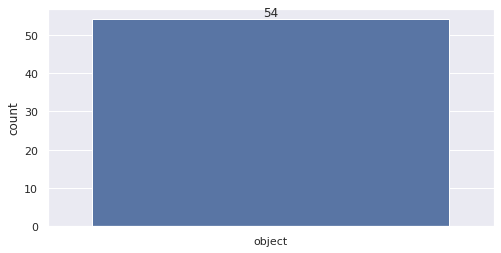

######################################################################################################################################################


In [126]:
plot_feature_types(peakTable)

### For further analysis, we prefer peak table intensites as float

In [127]:
peakTable[peakTable.columns[2:]] = peakTable[peakTable.columns[2:]].apply(pd.to_numeric, errors='coerce', axis=1)
peakTable

0    sample BAs  a-MCA   ACA  b-MCA      CA   CDCA   HCA   GCA  GCDCA  ...  \
0    HCL-11  HC   0.47 28.32  39.17 1310.43 121.32 18.14 50.29   5.32  ...   
1     HCL-9  HC  59.61 57.98  26.27 3348.52 245.13 59.88 21.92   1.78  ...   
2    HCL-10  HC   8.68  6.44   1.53  404.87  90.94 11.00  0.32   0.44  ...   
3     HCL-1  HC   2.98 21.57   8.65 1341.37 389.25 10.37  4.69   1.50  ...   
4    HCL-12  HC  15.83  4.01   7.78  319.58  35.89 15.34  0.44   0.31  ...   
..      ...  ..    ...   ...    ...     ...    ...   ...   ...    ...  ...   
90    CH-88  CJ   0.47  0.54   0.03   15.68  12.36  0.40  0.00   0.05  ...   
91    CH-92  CJ   0.12  0.76   0.04   96.98  54.88  1.23  0.01   0.01  ...   
92    CH-89  CJ   3.07  0.42   0.04   46.44  62.85  0.42  0.89   3.51  ...   
93  CH-95-1  CJ   5.37  0.88   1.59  293.05 129.83  2.94  0.57   0.95  ...   
94    CH-54  CJ   0.02  0.08   0.04   26.94  13.25  0.23  0.25   1.54  ...   

0   TUDCA  CA:CDCA  DCA:CA  GDCA:CA  TDCA:CA  LCA:CDCA  GLCA:CDCA  TLCA:CDCA  \
0   83.36    10.80    0.13     0.00     0.00      0.00       0.00       0.00   
1    0.68    13.66    0.09     0.00     0.00      0.00       0.00       0.00   
2    0.28     4.45    0.29     0.00     0.00      0.03       0.00       0.00   
3    0.04     3.45    0.00     0.00     0.00      0.00       0.00       0.00   
4    0.04     8.90    0.14     0.00     0.00      0.04       0.00       0.00   
..    ...      ...     ...      ...      ...       ...        ...        ...   
90   0.01     1.27    0.85     0.00     0.00      0.03       0.00       0.00   
91   0.00     1.77    0.63     0.00     0.00      0.00       0.00       0.00   
92   0.04     0.74    1.55     0.00     0.00      0.00       0.00       0.00   
93   5.58     2.26    0.51     0.00     0.01      0.00       0.00       0.00   
94   0.00     2.03    0.58     0.00     0.00      0.00       0.00       0.00   

0   GDCA:DCA  TDCA:DCA  
0       0.00      0.00  
1       0.00      0.00  
2       0.00      0.00  
3       0.02      0.04  
4       0.00      0.00  
..       ...       ...  
90      0.00      0.00  
91      0.00      0.00  
92      0.00      0.00  
93      0.00      0.03  
94      0.00      0.00  

[95 rows x 54 columns]

######################################################################################################################################################
Data types : 
float64    52
object      2
dtype: int64



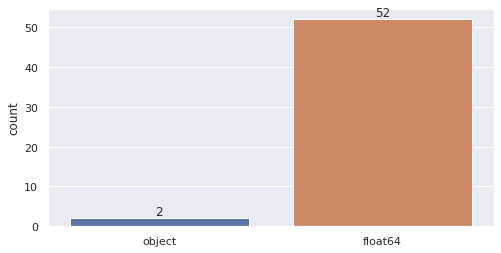

######################################################################################################################################################


In [128]:
plot_feature_types(peakTable)

### Re-subset X to have numerical values instead of object

In [129]:
X = peakTable.iloc[:, 2:]
X

0   a-MCA   ACA  b-MCA      CA   CDCA   HCA   GCA  GCDCA  GHCA  T-b-MCA  ...  \
0    0.47 28.32  39.17 1310.43 121.32 18.14 50.29   5.32  0.40     2.61  ...   
1   59.61 57.98  26.27 3348.52 245.13 59.88 21.92   1.78  0.25     3.55  ...   
2    8.68  6.44   1.53  404.87  90.94 11.00  0.32   0.44  0.04     0.03  ...   
3    2.98 21.57   8.65 1341.37 389.25 10.37  4.69   1.50  0.03     0.20  ...   
4   15.83  4.01   7.78  319.58  35.89 15.34  0.44   0.31  0.03     0.00  ...   
..    ...   ...    ...     ...    ...   ...   ...    ...   ...      ...  ...   
90   0.47  0.54   0.03   15.68  12.36  0.40  0.00   0.05  0.00     0.07  ...   
91   0.12  0.76   0.04   96.98  54.88  1.23  0.01   0.01  0.00     0.05  ...   
92   3.07  0.42   0.04   46.44  62.85  0.42  0.89   3.51  0.02     0.12  ...   
93   5.37  0.88   1.59  293.05 129.83  2.94  0.57   0.95  0.00     0.25  ...   
94   0.02  0.08   0.04   26.94  13.25  0.23  0.25   1.54  0.03     0.00  ...   

0   TUDCA  CA:CDCA  DCA:CA  GDCA:CA  TDCA:CA  LCA:CDCA  GLCA:CDCA  TLCA:CDCA  \
0   83.36    10.80    0.13     0.00     0.00      0.00       0.00       0.00   
1    0.68    13.66    0.09     0.00     0.00      0.00       0.00       0.00   
2    0.28     4.45    0.29     0.00     0.00      0.03       0.00       0.00   
3    0.04     3.45    0.00     0.00     0.00      0.00       0.00       0.00   
4    0.04     8.90    0.14     0.00     0.00      0.04       0.00       0.00   
..    ...      ...     ...      ...      ...       ...        ...        ...   
90   0.01     1.27    0.85     0.00     0.00      0.03       0.00       0.00   
91   0.00     1.77    0.63     0.00     0.00      0.00       0.00       0.00   
92   0.04     0.74    1.55     0.00     0.00      0.00       0.00       0.00   
93   5.58     2.26    0.51     0.00     0.01      0.00       0.00       0.00   
94   0.00     2.03    0.58     0.00     0.00      0.00       0.00       0.00   

0   GDCA:DCA  TDCA:DCA  
0       0.00      0.00  
1       0.00      0.00  
2       0.00      0.00  
3       0.02      0.04  
4       0.00      0.00  
..       ...       ...  
90      0.00      0.00  
91      0.00      0.00  
92      0.00      0.00  
93      0.00      0.03  
94      0.00      0.00  

[95 rows x 52 columns]

## b - Missing values exploration

######################################################################################################################################################
Considering None as missing values :
- Total number of missing values : 16
- Percent of missing values : 0.32%



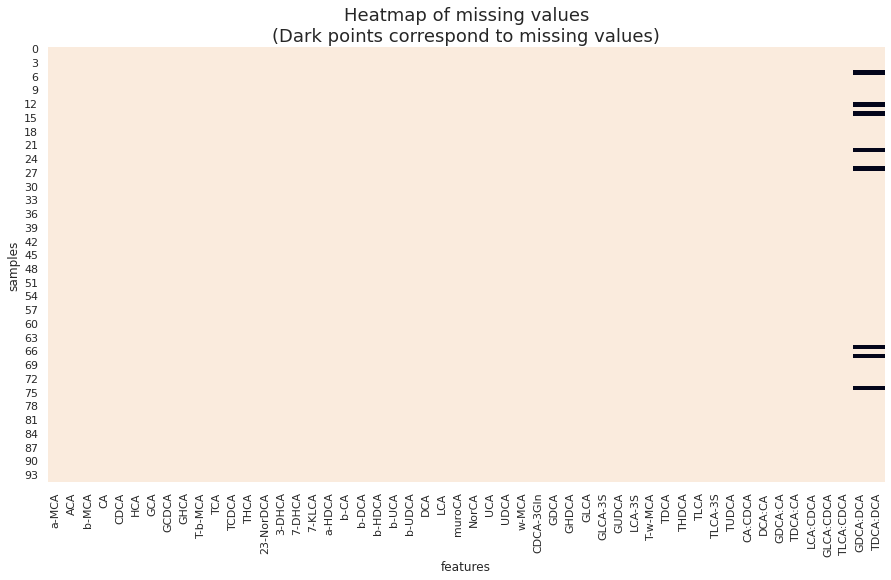

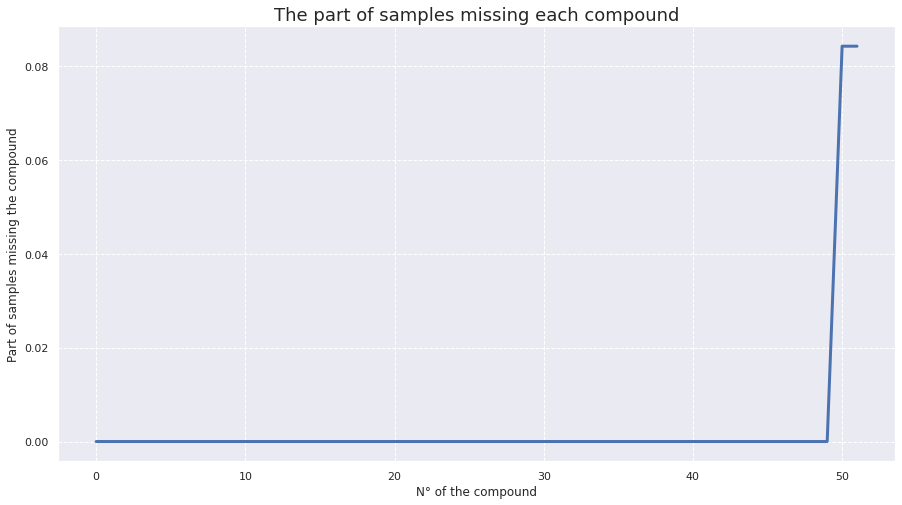



######################################################################################################################################################


In [130]:
plot_infos_missing_values(X)

### The function <code>plot_infos_missing_values</code> was developed to spot values equal to <code>NaN</code> by default. Here there are NaNs but missing values can also be in another form (0, 1, a specific string e.g. *'Unknown'* or *'NA'*, ...). We can pass argument <code>na_values</code> to specify the type of missing values in the peak table.

######################################################################################################################################################
Considering 0 as missing values :
- Total number of missing values : 418
- Percent of missing values : 8.46%



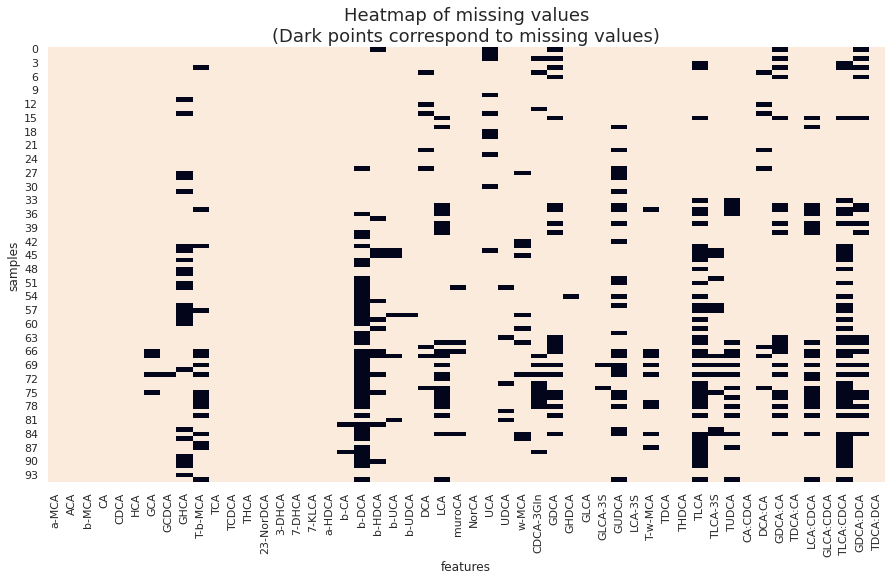

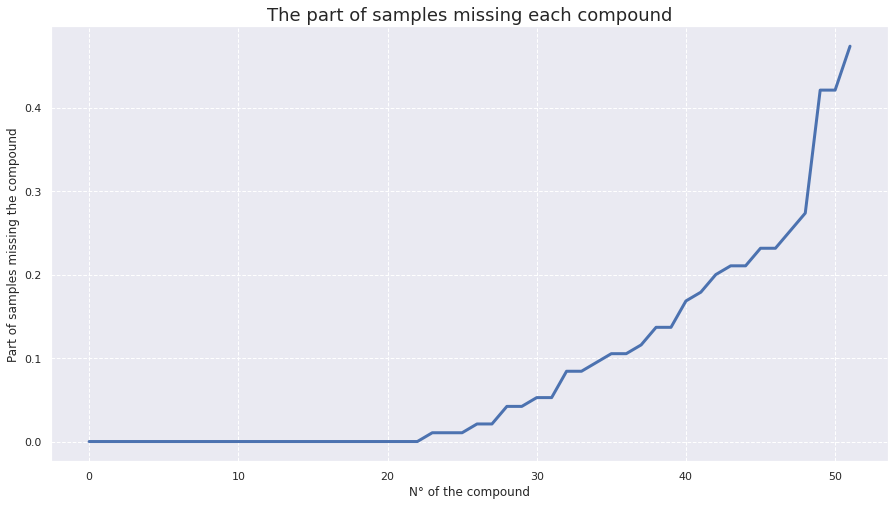



######################################################################################################################################################


In [131]:
plot_infos_missing_values(X, na_values=0)

## c - Correlation between features

######################################################################################################################################################


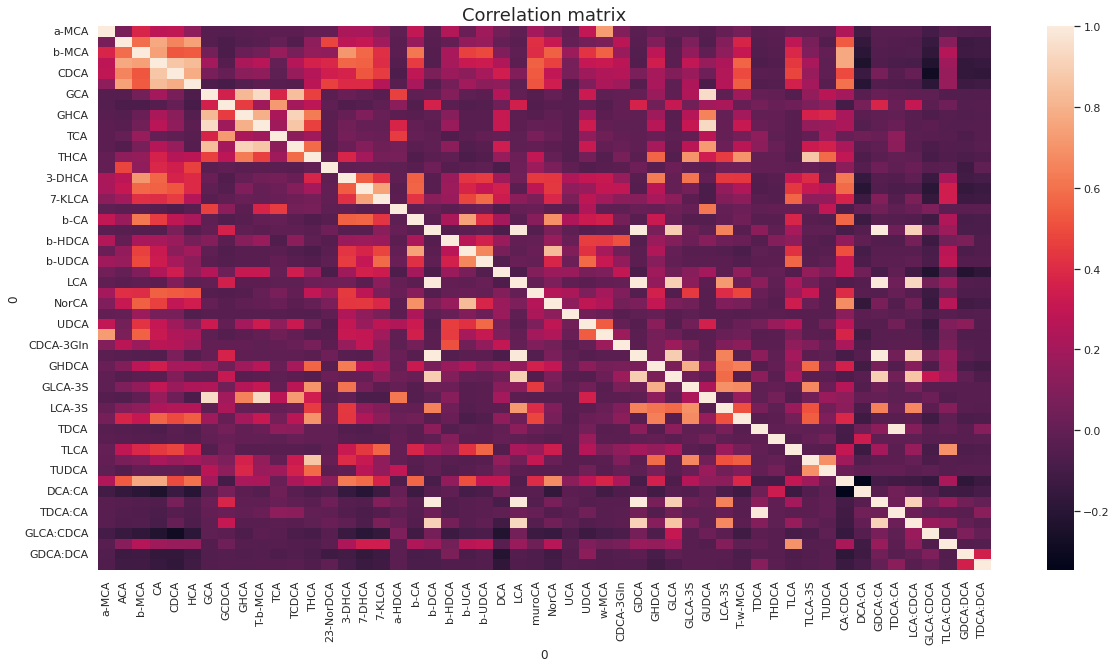

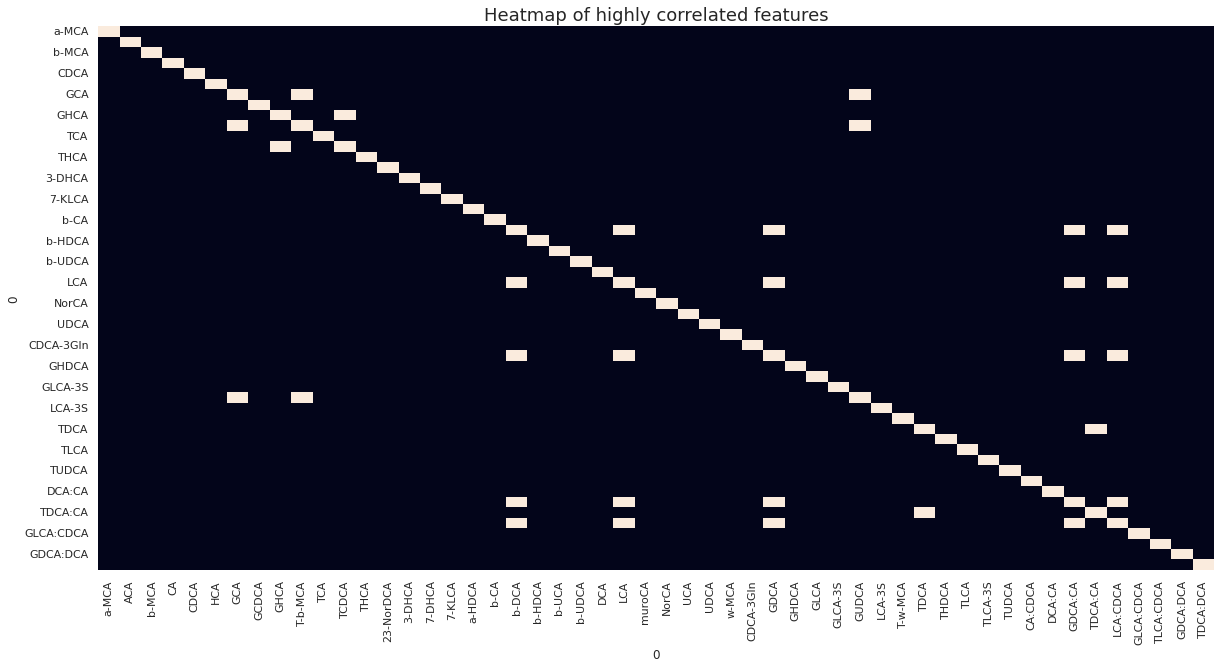



###################################################################################################################################################### 



In [132]:
plot_correlation_matrix(X, threshold=0.9)

## d - Remove strongly correlated features (to potentially avoid issues during further analysis)

In [133]:
X_remove_corr = remove_correlated_features(X)
X_remove_corr

Initial shape : (95, 52)
Final shape : (95, 48)

Time to compute : 00h00m00s

 ######################################################################################################################################################






0   a-MCA   ACA  b-MCA      CA   CDCA   HCA   GCA  GCDCA  GHCA  T-b-MCA  ...  \
0    0.47 28.32  39.17 1310.43 121.32 18.14 50.29   5.32  0.40     2.61  ...   
1   59.61 57.98  26.27 3348.52 245.13 59.88 21.92   1.78  0.25     3.55  ...   
2    8.68  6.44   1.53  404.87  90.94 11.00  0.32   0.44  0.04     0.03  ...   
3    2.98 21.57   8.65 1341.37 389.25 10.37  4.69   1.50  0.03     0.20  ...   
4   15.83  4.01   7.78  319.58  35.89 15.34  0.44   0.31  0.03     0.00  ...   
..    ...   ...    ...     ...    ...   ...   ...    ...   ...      ...  ...   
90   0.47  0.54   0.03   15.68  12.36  0.40  0.00   0.05  0.00     0.07  ...   
91   0.12  0.76   0.04   96.98  54.88  1.23  0.01   0.01  0.00     0.05  ...   
92   3.07  0.42   0.04   46.44  62.85  0.42  0.89   3.51  0.02     0.12  ...   
93   5.37  0.88   1.59  293.05 129.83  2.94  0.57   0.95  0.00     0.25  ...   
94   0.02  0.08   0.04   26.94  13.25  0.23  0.25   1.54  0.03     0.00  ...   

0   TLCA  TLCA-3S  TUDCA  CA:CDCA  DCA:CA  LCA:CDCA  GLCA:CDCA  TLCA:CDCA  \
0   0.00     1.19  83.36    10.80    0.13      0.00       0.00       0.00   
1   0.04     0.75   0.68    13.66    0.09      0.00       0.00       0.00   
2   0.01     0.11   0.28     4.45    0.29      0.03       0.00       0.00   
3   0.00     0.66   0.04     3.45    0.00      0.00       0.00       0.00   
4   0.00     0.07   0.04     8.90    0.14      0.04       0.00       0.00   
..   ...      ...    ...      ...     ...       ...        ...        ...   
90  0.00     0.44   0.01     1.27    0.85      0.03       0.00       0.00   
91  0.00     0.44   0.00     1.77    0.63      0.00       0.00       0.00   
92  0.00     0.37   0.04     0.74    1.55      0.00       0.00       0.00   
93  0.02     1.78   5.58     2.26    0.51      0.00       0.00       0.00   
94  0.00     0.06   0.00     2.03    0.58      0.00       0.00       0.00   

0   GDCA:DCA  TDCA:DCA  
0       0.00      0.00  
1       0.00      0.00  
2       0.00      0.00  
3       0.02      0.04  
4       0.00      0.00  
..       ...       ...  
90      0.00      0.00  
91      0.00      0.00  
92      0.00      0.00  
93      0.00      0.03  
94      0.00      0.00  

[95 rows x 48 columns]

In [134]:
peakTable_remove_corr = pd.concat([metadata, X_remove_corr], axis=1)
peakTable_remove_corr

0    sample BAs  a-MCA   ACA  b-MCA      CA   CDCA   HCA   GCA  GCDCA  ...  \
0    HCL-11  HC   0.47 28.32  39.17 1310.43 121.32 18.14 50.29   5.32  ...   
1     HCL-9  HC  59.61 57.98  26.27 3348.52 245.13 59.88 21.92   1.78  ...   
2    HCL-10  HC   8.68  6.44   1.53  404.87  90.94 11.00  0.32   0.44  ...   
3     HCL-1  HC   2.98 21.57   8.65 1341.37 389.25 10.37  4.69   1.50  ...   
4    HCL-12  HC  15.83  4.01   7.78  319.58  35.89 15.34  0.44   0.31  ...   
..      ...  ..    ...   ...    ...     ...    ...   ...   ...    ...  ...   
90    CH-88  CJ   0.47  0.54   0.03   15.68  12.36  0.40  0.00   0.05  ...   
91    CH-92  CJ   0.12  0.76   0.04   96.98  54.88  1.23  0.01   0.01  ...   
92    CH-89  CJ   3.07  0.42   0.04   46.44  62.85  0.42  0.89   3.51  ...   
93  CH-95-1  CJ   5.37  0.88   1.59  293.05 129.83  2.94  0.57   0.95  ...   
94    CH-54  CJ   0.02  0.08   0.04   26.94  13.25  0.23  0.25   1.54  ...   

0   TLCA  TLCA-3S  TUDCA  CA:CDCA  DCA:CA  LCA:CDCA  GLCA:CDCA  TLCA:CDCA  \
0   0.00     1.19  83.36    10.80    0.13      0.00       0.00       0.00   
1   0.04     0.75   0.68    13.66    0.09      0.00       0.00       0.00   
2   0.01     0.11   0.28     4.45    0.29      0.03       0.00       0.00   
3   0.00     0.66   0.04     3.45    0.00      0.00       0.00       0.00   
4   0.00     0.07   0.04     8.90    0.14      0.04       0.00       0.00   
..   ...      ...    ...      ...     ...       ...        ...        ...   
90  0.00     0.44   0.01     1.27    0.85      0.03       0.00       0.00   
91  0.00     0.44   0.00     1.77    0.63      0.00       0.00       0.00   
92  0.00     0.37   0.04     0.74    1.55      0.00       0.00       0.00   
93  0.02     1.78   5.58     2.26    0.51      0.00       0.00       0.00   
94  0.00     0.06   0.00     2.03    0.58      0.00       0.00       0.00   

0   GDCA:DCA  TDCA:DCA  
0       0.00      0.00  
1       0.00      0.00  
2       0.00      0.00  
3       0.02      0.04  
4       0.00      0.00  
..       ...       ...  
90      0.00      0.00  
91      0.00      0.00  
92      0.00      0.00  
93      0.00      0.03  
94      0.00      0.00  

[95 rows x 50 columns]

## e - PCA

In [135]:
import cimcb_lite as cb

In [136]:
if plot_infos_missing_values(X, plot=False) == 0:
    cb.plot.pca(X, pcx=1, pcy=2, group_label=target)
else:
    print('NaNs in peak table, please impute before using PCA')

NaNs in peak table, please impute before using PCA


In [137]:
if plot_infos_missing_values(X, plot=False) == 0:
    PCA_3D(X, peakTable, 'Disease')
else:
    print('NaNs in peak table, please impute before using PCA')

NaNs in peak table, please impute before using PCA


### We will plot PCA after missing value imputation

## f - Target visualisation

In [138]:
#target = 

######################################################################################################################################################
Target values : 
CJ     54
HFI    25
HC     16
Name: BAs, dtype: int64



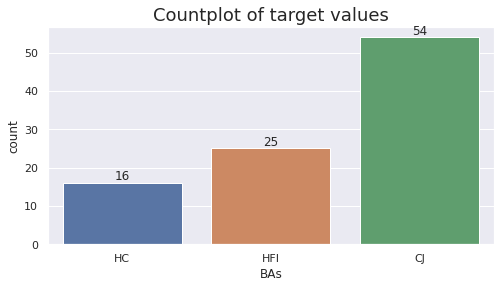

###################################################################################################################################################### 



In [139]:
plot_target(target)

## g - Feature visualisation

The following visualisations show the distributions of the chosen features of the peak table.

### We can set the number of features with <code>nb_features</code> parameter, which will plot the first N features of the peak table.

######################################################################################################################################################



<Figure size 720x720 with 0 Axes>

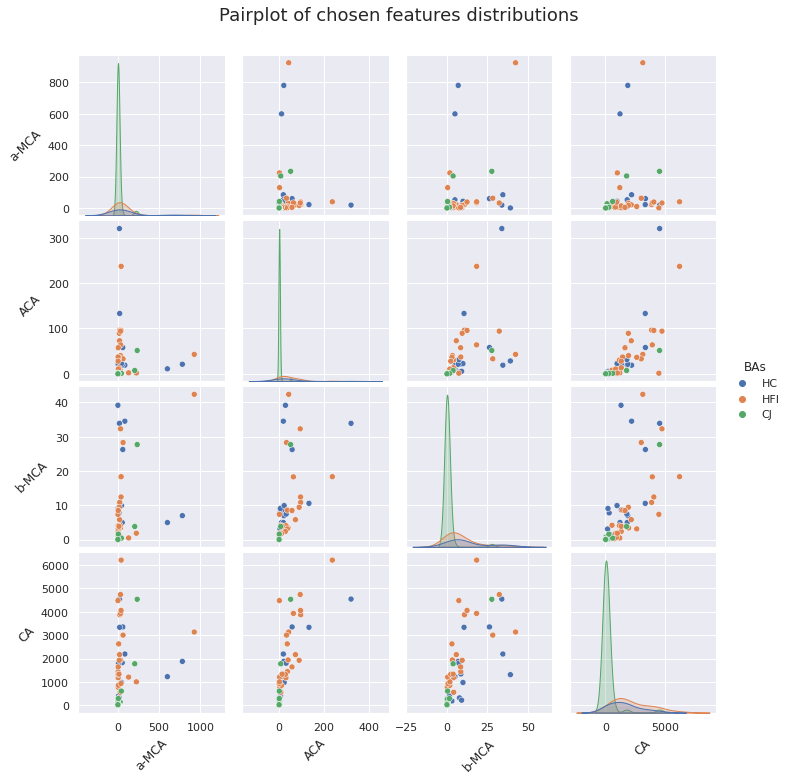

###################################################################################################################################################### 



In [140]:
plot_pairplot_distributions(X, target, nb_features=4)

### We can also set the list of features we want to plot with <code>list_features</code> parameter.

In [141]:
n_features = 3

list_features = random.sample(X.columns.tolist(), n_features)
list_features

['T-w-MCA', 'b-HDCA', 'UDCA']

######################################################################################################################################################



<Figure size 720x720 with 0 Axes>

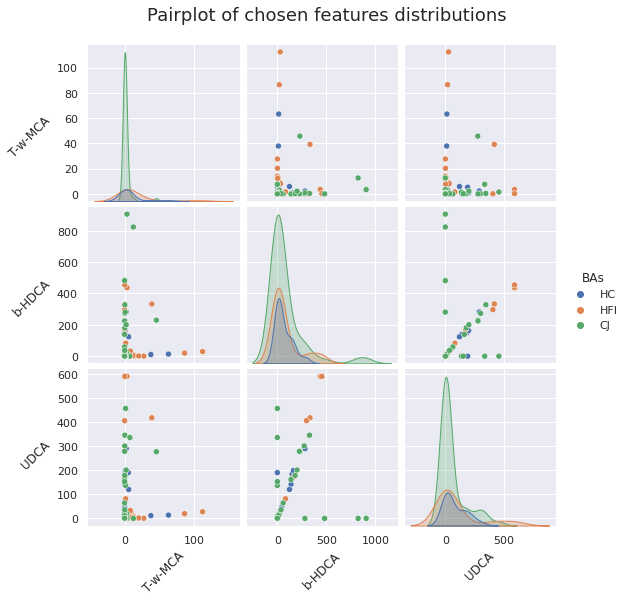

###################################################################################################################################################### 



In [142]:
plot_pairplot_distributions(X, target, list_features=list_features)

### Here we can observe histogram and boxplot for each chosen feature

######################################################################################################################################################

------------------------------------------------------------------------------------------------------------------------


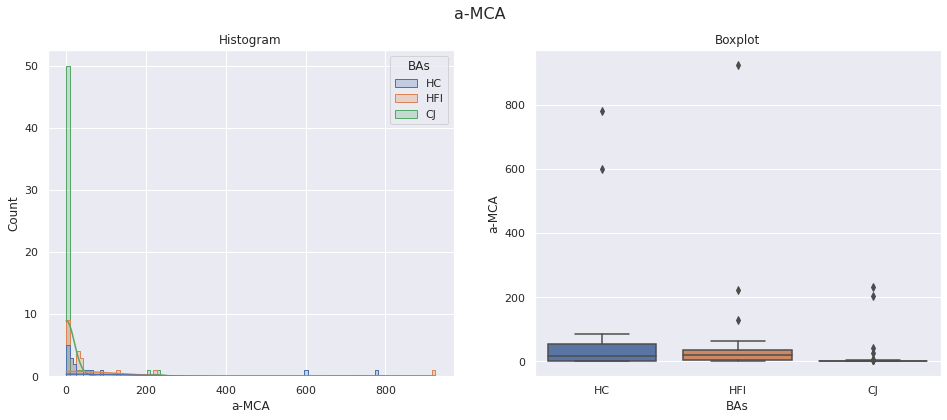

------------------------------------------------------------------------------------------------------------------------


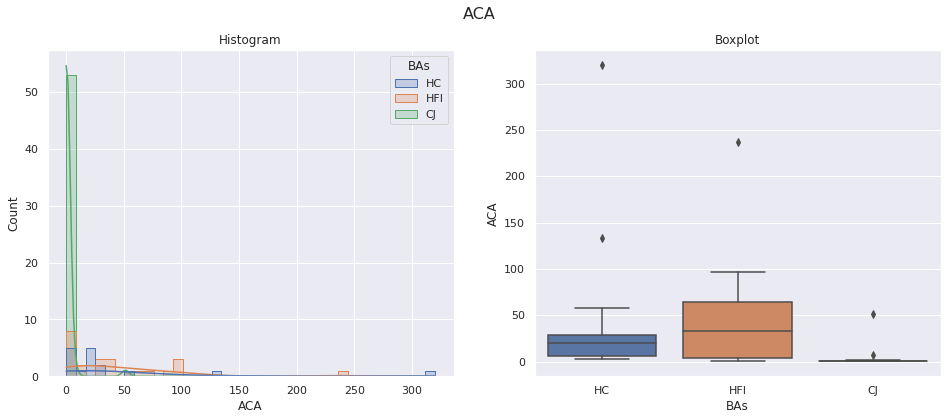

------------------------------------------------------------------------------------------------------------------------


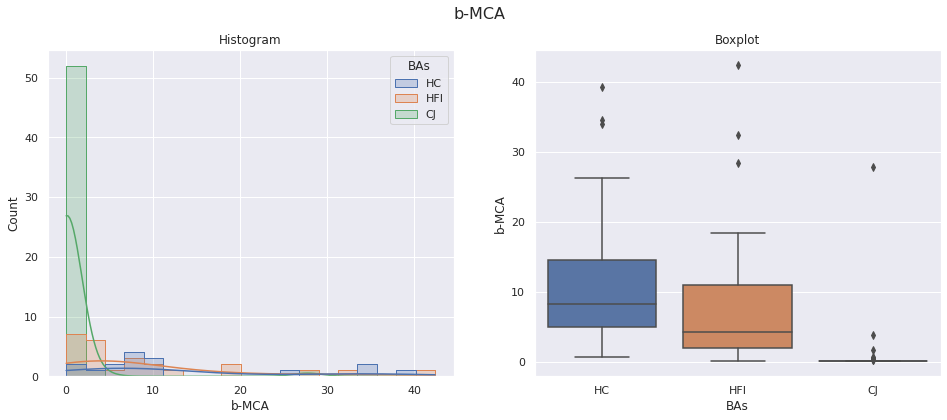

------------------------------------------------------------------------------------------------------------------------


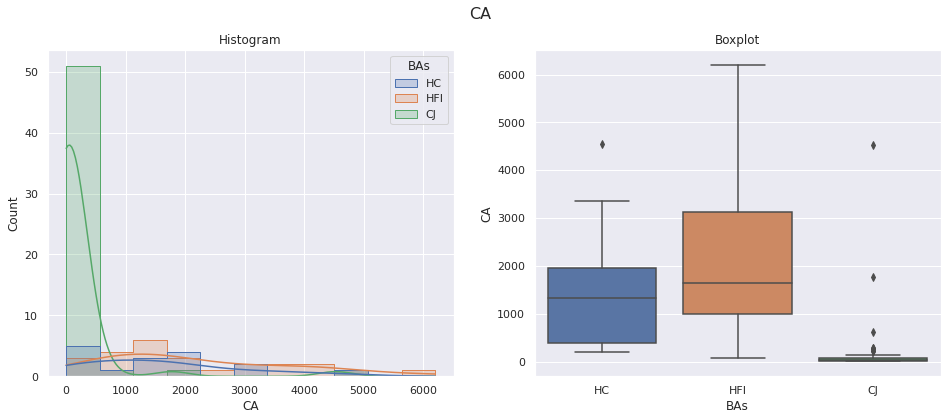

------------------------------------------------------------------------------------------------------------------------ 

######################################################################################################################################################


In [143]:
plot_hist_boxplot_distributions(X, target, nb_features=4)

######################################################################################################################################################

------------------------------------------------------------------------------------------------------------------------


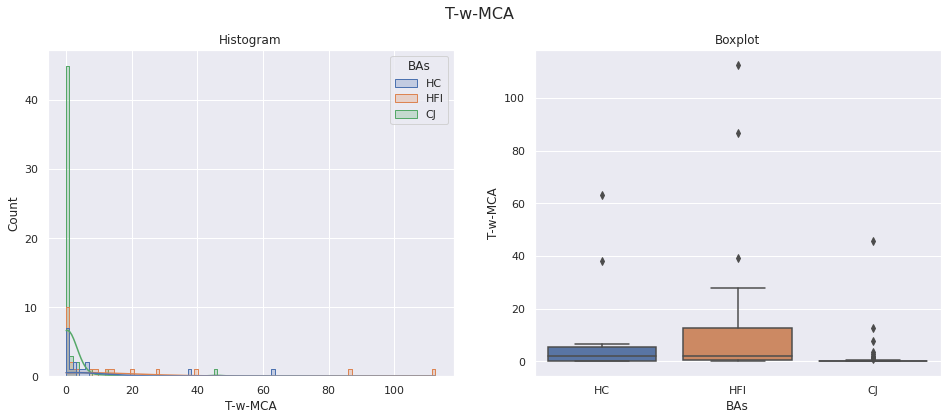

------------------------------------------------------------------------------------------------------------------------


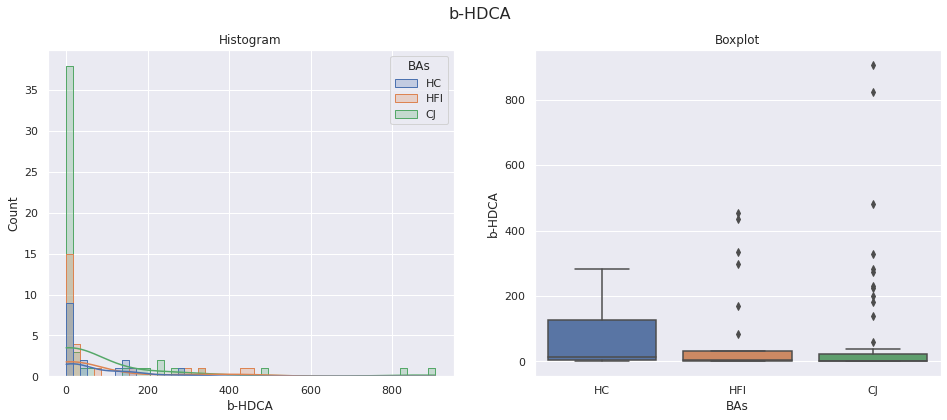

------------------------------------------------------------------------------------------------------------------------


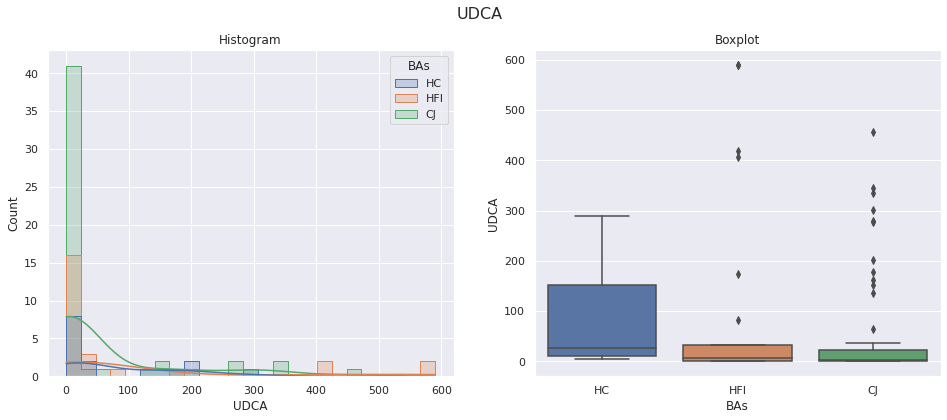

------------------------------------------------------------------------------------------------------------------------ 

######################################################################################################################################################


In [144]:
plot_hist_boxplot_distributions(X, target, list_features=list_features)

# 2 - Impute missing values

In [145]:
from missing_value_imputation_functions import *

### We observed before that missing values are here NaNs but there are also 0's. For further analysis, we prefer to avoid having 0's for mathematical purposes, we can replace these zeros by other values

######################################################################################################################################################
Considering None as missing values :
- Total number of missing values : 16
- Percent of missing values : 0.32%



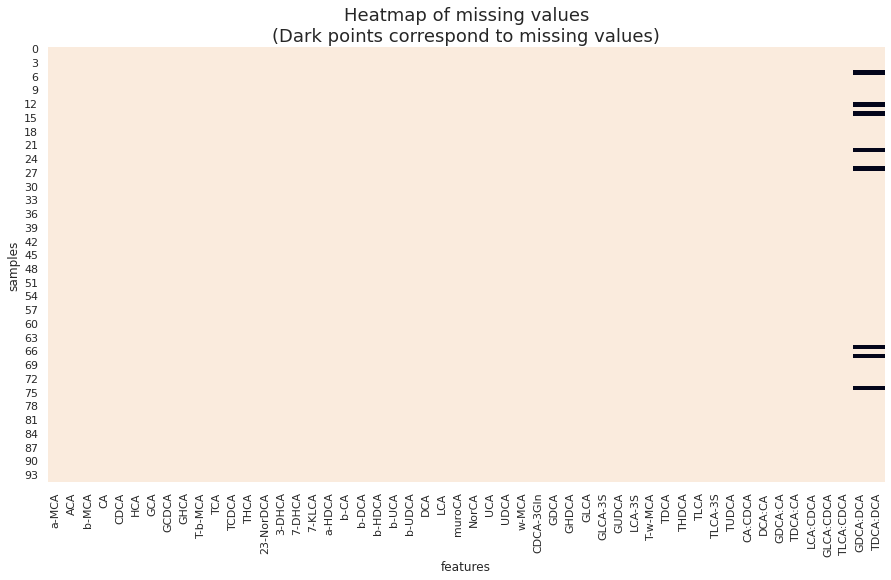

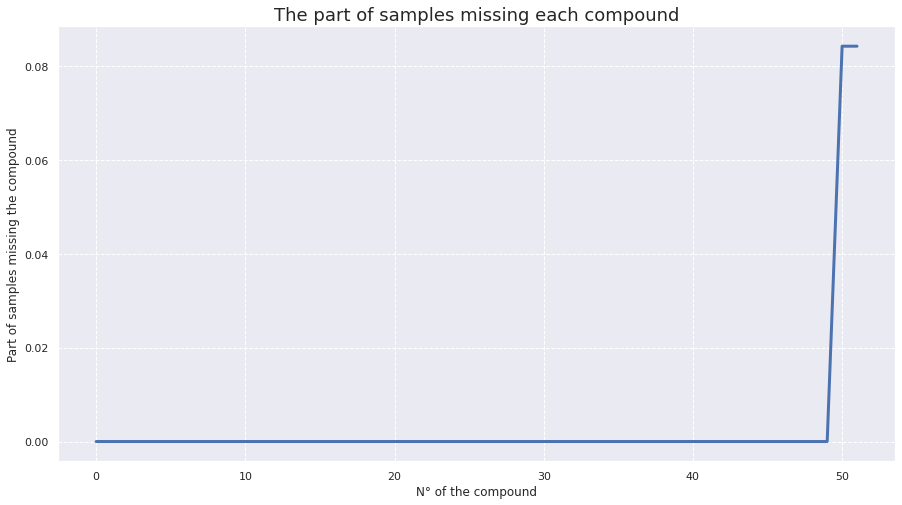



######################################################################################################################################################


In [146]:
plot_infos_missing_values(X, na_values=None) # same as simply plot_infos_missing_values(X)

######################################################################################################################################################
Considering 0 as missing values :
- Total number of missing values : 418
- Percent of missing values : 8.46%



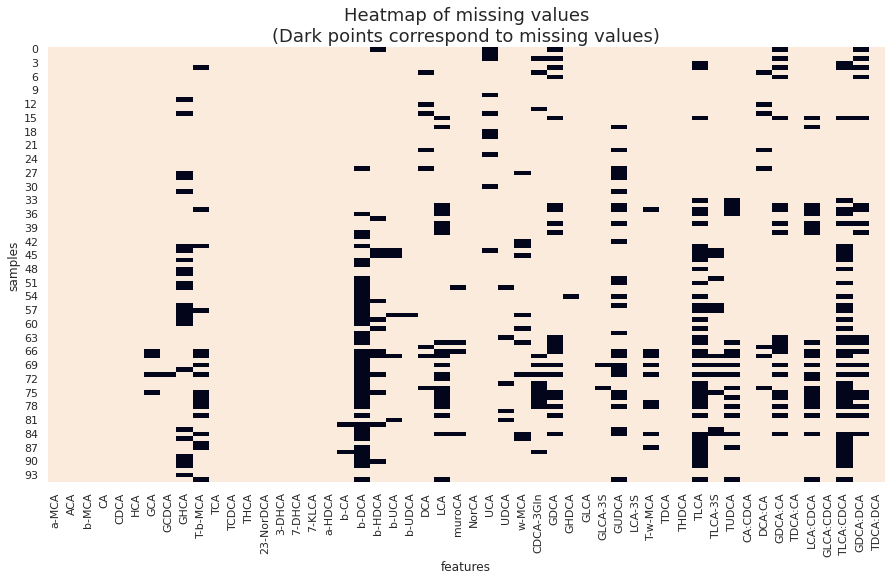

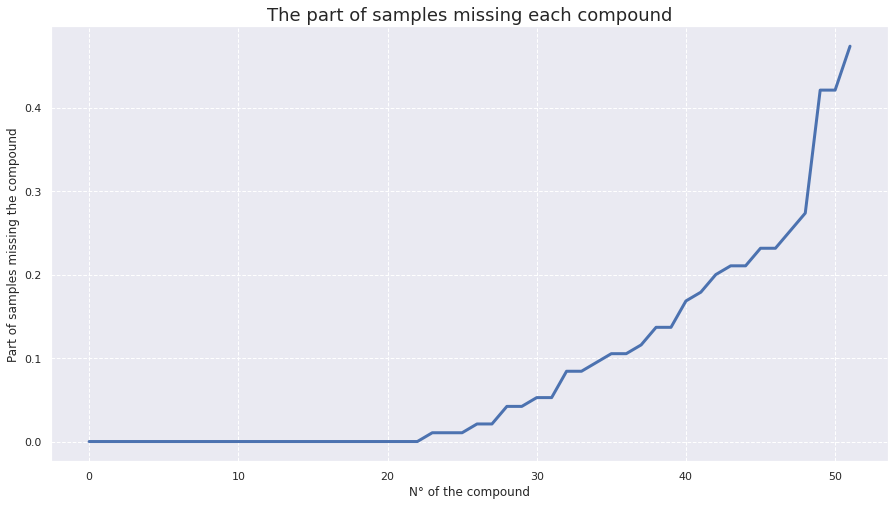



######################################################################################################################################################


In [147]:
plot_infos_missing_values(X, na_values=0)

### Set 0 to NaN to then impute with chosen imputer

In [148]:
X_with_Nan = X.copy()
X_with_Nan[X_with_Nan == 0] = np.nan

### Here it's probably not the best idea to impute missing values with 1's, because some values in the peak table are inferior to 1

## a - Impute intensities with half minimum value in features

In [149]:
X_imp_halfmin = half_min_imputer(X_with_Nan)
X_imp_halfmin

0   a-MCA   ACA  b-MCA      CA   CDCA   HCA   GCA  GCDCA  GHCA  T-b-MCA  ...  \
0    0.47 28.32  39.17 1310.43 121.32 18.14 50.29   5.32  0.40     2.61  ...   
1   59.61 57.98  26.27 3348.52 245.13 59.88 21.92   1.78  0.25     3.55  ...   
2    8.68  6.44   1.53  404.87  90.94 11.00  0.32   0.44  0.04     0.03  ...   
3    2.98 21.57   8.65 1341.37 389.25 10.37  4.69   1.50  0.03     0.20  ...   
4   15.83  4.01   7.78  319.58  35.89 15.34  0.44   0.31  0.03     0.00  ...   
..    ...   ...    ...     ...    ...   ...   ...    ...   ...      ...  ...   
90   0.47  0.54   0.03   15.68  12.36  0.40  0.00   0.05  0.00     0.07  ...   
91   0.12  0.76   0.04   96.98  54.88  1.23  0.01   0.01  0.00     0.05  ...   
92   3.07  0.42   0.04   46.44  62.85  0.42  0.89   3.51  0.02     0.12  ...   
93   5.37  0.88   1.59  293.05 129.83  2.94  0.57   0.95  0.00     0.25  ...   
94   0.02  0.08   0.04   26.94  13.25  0.23  0.25   1.54  0.03     0.00  ...   

0   TUDCA  CA:CDCA  DCA:CA  GDCA:CA  TDCA:CA  LCA:CDCA  GLCA:CDCA  TLCA:CDCA  \
0   83.36    10.80    0.13     0.00     0.00      0.00       0.00       0.00   
1    0.68    13.66    0.09     0.00     0.00      0.00       0.00       0.00   
2    0.28     4.45    0.29     0.00     0.00      0.03       0.00       0.00   
3    0.04     3.45    0.00     0.00     0.00      0.00       0.00       0.00   
4    0.04     8.90    0.14     0.00     0.00      0.04       0.00       0.00   
..    ...      ...     ...      ...      ...       ...        ...        ...   
90   0.01     1.27    0.85     0.00     0.00      0.03       0.00       0.00   
91   0.00     1.77    0.63     0.00     0.00      0.00       0.00       0.00   
92   0.04     0.74    1.55     0.00     0.00      0.00       0.00       0.00   
93   5.58     2.26    0.51     0.00     0.01      0.00       0.00       0.00   
94   0.00     2.03    0.58     0.00     0.00      0.00       0.00       0.00   

0   GDCA:DCA  TDCA:DCA  
0       0.00      0.00  
1       0.00      0.00  
2       0.00      0.00  
3       0.02      0.04  
4       0.00      0.00  
..       ...       ...  
90      0.00      0.00  
91      0.00      0.00  
92      0.00      0.00  
93      0.00      0.03  
94      0.00      0.00  

[95 rows x 52 columns]

### We can check that there is no more missing values in the imputed peak tables

In [150]:
plot_infos_missing_values(X_imp_halfmin)

######################################################################################################################################################
Considering None as missing values :
- Total number of missing values : 0
- Percent of missing values : 0.00%



0

In [151]:
plot_infos_missing_values(X_imp_halfmin, na_values=0)

######################################################################################################################################################
Considering 0 as missing values :
- Total number of missing values : 0
- Percent of missing values : 0.00%



0

## b - PCA

In [152]:
if plot_infos_missing_values(X_imp_halfmin, plot=False) == 0:
    cb.plot.pca(X_imp_halfmin, pcx=1, pcy=2, group_label=target)
else:
    print('NaNs in peak table, please impute before using PCA')

/opt/conda/lib/python3.10/site-packages/bokeh/util/deprecation.py:75: BokehDeprecationWarning:

'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead

/opt/conda/lib/python3.10/site-packages/bokeh/util/deprecation.py:75: BokehDeprecationWarning:

'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead



Loading BokehJS ...

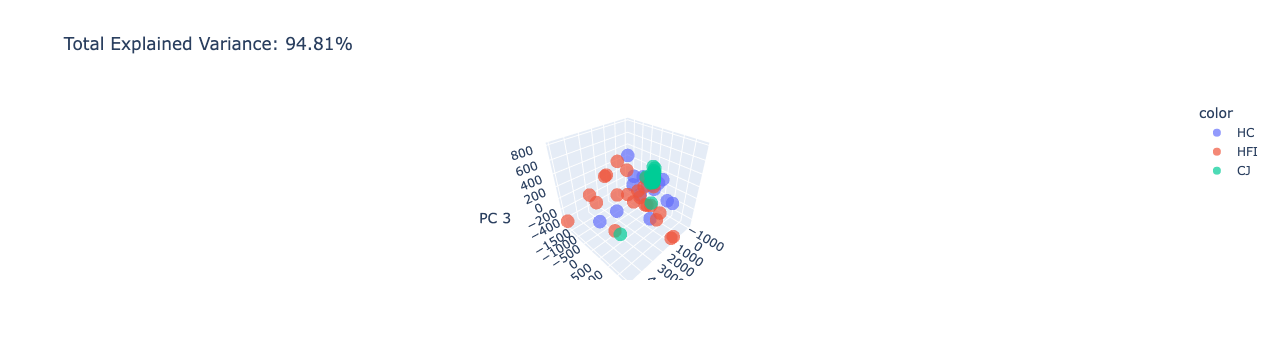

In [153]:
if plot_infos_missing_values(X_imp_halfmin, plot=False) == 0:
    PCA_3D(X_imp_halfmin, peakTable, target.name)
else:
    print('NaNs in peak table, please impute before using PCA')

# 3 - Transformations

In [154]:
from normalisation_scaling_functions import *

## a - log transformation

In [155]:
X_imp_halfmin_log = normPeakTable(X_imp_halfmin, 'log10', based='metabolite')
X_imp_halfmin_log

0   a-MCA   ACA  b-MCA   CA  CDCA   HCA   GCA  GCDCA  GHCA  T-b-MCA  ...  \
0   -0.32  1.45   1.59 3.12  2.08  1.26  1.70   0.73 -0.40     0.42  ...   
1    1.78  1.76   1.42 3.52  2.39  1.78  1.34   0.25 -0.60     0.55  ...   
2    0.94  0.81   0.18 2.61  1.96  1.04 -0.49  -0.36 -1.42    -1.60  ...   
3    0.47  1.33   0.94 3.13  2.59  1.02  0.67   0.18 -1.57    -0.71  ...   
4    1.20  0.60   0.89 2.50  1.55  1.19 -0.36  -0.51 -1.48    -2.52  ...   
..    ...   ...    ...  ...   ...   ...   ...    ...   ...      ...  ...   
90  -0.32 -0.27  -1.59 1.20  1.09 -0.39 -2.32  -1.29 -3.29    -1.14  ...   
91  -0.93 -0.12  -1.35 1.99  1.74  0.09 -1.95  -2.05 -3.29    -1.27  ...   
92   0.49 -0.37  -1.43 1.67  1.80 -0.38 -0.05   0.55 -1.82    -0.90  ...   
93   0.73 -0.06   0.20 2.47  2.11  0.47 -0.25  -0.02 -3.29    -0.60  ...   
94  -1.73 -1.10  -1.43 1.43  1.12 -0.64 -0.61   0.19 -1.58    -2.52  ...   

0   TUDCA  CA:CDCA  DCA:CA  GDCA:CA  TDCA:CA  LCA:CDCA  GLCA:CDCA  TLCA:CDCA  \
0    1.92     1.03   -0.89    -6.00    -4.34     -2.34      -3.82      -4.63   
1   -0.17     1.14   -1.04    -4.83    -4.92     -3.47      -3.82      -3.75   
2   -0.56     0.65   -0.54    -6.00    -4.76     -1.57      -3.94      -4.02   
3   -1.42     0.54   -3.14    -4.83    -4.57     -3.53      -4.25      -5.64   
4   -1.41     0.95   -0.87    -6.00    -4.56     -1.37      -3.80      -5.64   
..    ...      ...     ...      ...      ...       ...        ...        ...   
90  -1.84     0.10   -0.07    -2.66    -2.95     -1.58      -2.72      -5.64   
91  -2.62     0.25   -0.20    -3.55    -3.76     -2.76      -3.37      -5.64   
92  -1.36    -0.13    0.19    -3.40    -3.53     -2.81      -3.66      -4.38   
93   0.75     0.35   -0.29    -4.03    -1.86     -2.80      -3.76      -3.86   
94  -3.49     0.31   -0.24    -3.43    -3.98     -4.96      -3.19      -5.64   

0   GDCA:DCA  TDCA:DCA  
0      -5.08     -3.45  
1      -3.79     -3.88  
2      -5.08     -4.22  
3      -1.69     -1.43  
4      -5.08     -3.69  
..       ...       ...  
90     -2.59     -2.88  
91     -3.35     -3.56  
92     -3.59     -3.72  
93     -3.74     -1.57  
94     -3.20     -3.74  

[95 rows x 52 columns]

## b - Standard scale intensities

In [156]:
X_imp_halfmin_log_std = normPeakTable(X_imp_halfmin_log, 'autoscaling', based='metabolites')
X_imp_halfmin_log_std

0   a-MCA   ACA  b-MCA    CA  CDCA   HCA   GCA  GCDCA  GHCA  T-b-MCA  ...  \
0   -0.46  1.12   1.70  0.92  0.33  0.73  1.67   0.80  1.31     1.14  ...   
1    1.18  1.40   1.55  1.35  0.78  1.21  1.39   0.36  1.12     1.26  ...   
2    0.53  0.52   0.50  0.39  0.15  0.52 -0.05  -0.19  0.34    -0.71  ...   
3    0.17  1.01   1.14  0.93  1.07  0.50  0.86   0.30  0.19     0.11  ...   
4    0.73  0.33   1.10  0.28 -0.43  0.66  0.05  -0.33  0.28    -1.55  ...   
..    ...   ...    ...   ...   ...   ...   ...    ...   ...      ...  ...   
90  -0.46 -0.47  -1.00 -1.09 -1.11 -0.81 -1.49  -1.05 -1.45    -0.29  ...   
91  -0.93 -0.34  -0.80 -0.26 -0.17 -0.36 -1.20  -1.74 -1.45    -0.41  ...   
92   0.18 -0.57  -0.86 -0.60 -0.08 -0.79  0.29   0.63 -0.05    -0.07  ...   
93   0.37 -0.28   0.52  0.24  0.38 -0.01  0.14   0.11 -1.45     0.21  ...   
94  -1.56 -1.24  -0.86 -0.85 -1.06 -1.03 -0.15   0.31  0.19    -1.55  ...   

0   TUDCA  CA:CDCA  DCA:CA  GDCA:CA  TDCA:CA  LCA:CDCA  GLCA:CDCA  TLCA:CDCA  \
0    2.26     1.36    0.21    -1.37    -0.68      0.66      -0.46      -0.03   
1    0.86     1.58    0.10    -0.45    -1.20     -0.25      -0.46       0.83   
2    0.59     0.56    0.46    -1.37    -1.06      1.28      -0.64       0.57   
3    0.01     0.32   -1.40    -0.45    -0.89     -0.30      -1.09      -1.02   
4    0.02     1.19    0.23    -1.37    -0.87      1.45      -0.44      -1.02   
..    ...      ...     ...      ...      ...       ...        ...        ...   
90  -0.27    -0.59    0.80     1.28     0.56      1.28       1.14      -1.02   
91  -0.80    -0.29    0.70     0.57    -0.17      0.32       0.19      -1.02   
92   0.05    -1.08    0.98     0.69     0.04      0.28      -0.23       0.21   
93   1.47    -0.06    0.64     0.19     1.52      0.28      -0.37       0.72   
94  -1.39    -0.16    0.68     0.66    -0.36     -1.47       0.46      -1.02   

0   GDCA:DCA  TDCA:DCA  
0      -1.07     -0.36  
1      -0.24     -0.64  
2      -1.07     -0.85  
3       1.12      0.90  
4      -1.07     -0.52  
..       ...       ...  
90      0.54     -0.01  
91      0.05     -0.44  
92     -0.11     -0.54  
93     -0.20      0.81  
94      0.15     -0.55  

[95 rows x 52 columns]

# 4 - Dimensionality reduction

In [157]:
from dimensionality_reduction_functions import *

## a - PCA then t-SNE

### The point of this step is to reduce dimensionality, argument <code>part_explained_variance</code> can be changed to set the part of initial explained variance we want to keep after reduction. We can also set the <code>n_components</code> argument to keep a specific number of PCA components.

In [158]:
# target = 

#################################################################################################### 



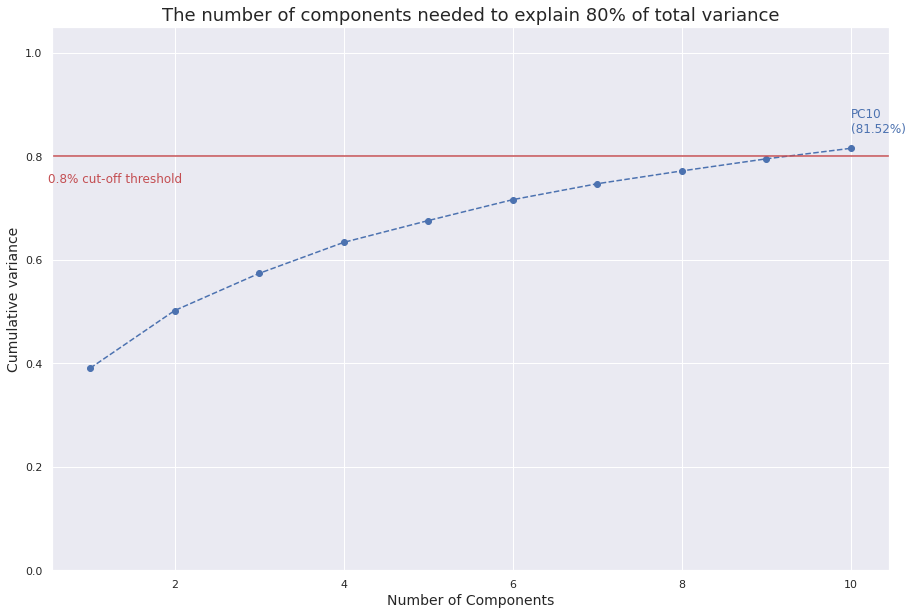

Initial number of dimension : 52
Final number of dimension : 10


PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10
0  -6.03 -0.06  1.83  1.66 -1.48  1.04 -2.64  1.66 -0.56 -1.99
1  -7.05 -1.41 -0.18  1.90 -0.92  1.77 -1.57  0.80  0.49 -0.12
2  -2.70 -3.15 -1.36  4.87 -0.83  1.78 -0.37  0.76  0.76 -0.62
3  -2.55 -0.93 -0.72 -1.17 -1.18 -0.29  0.74  0.36 -2.01 -1.45
4  -0.89 -3.91 -0.91  2.34  0.23  0.07  0.13  0.73 -1.04 -0.68
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
90  4.10  1.39 -2.11  1.04 -0.22 -1.55 -1.31  0.35 -0.89 -0.88
91  3.54 -0.40 -1.24 -0.08  1.31 -2.04 -1.12  0.25 -0.45 -0.62
92  1.69  1.05  0.63  1.42 -0.53 -1.32 -0.25 -1.73  0.83 -0.55
93 -2.67  1.72 -0.35  1.39 -2.02  0.34 -0.16 -1.08 -1.40  2.52
94  4.89 -1.43  2.07 -0.32  0.36 -0.10 -0.31 -0.25  0.87 -0.99

[95 rows x 10 columns]


 #################################################################################################### 

Time to compute t-SNE (input dataframe of shape (95, 10)) : 0.32 seconds

----------------------------------------------------------------------------------------------------


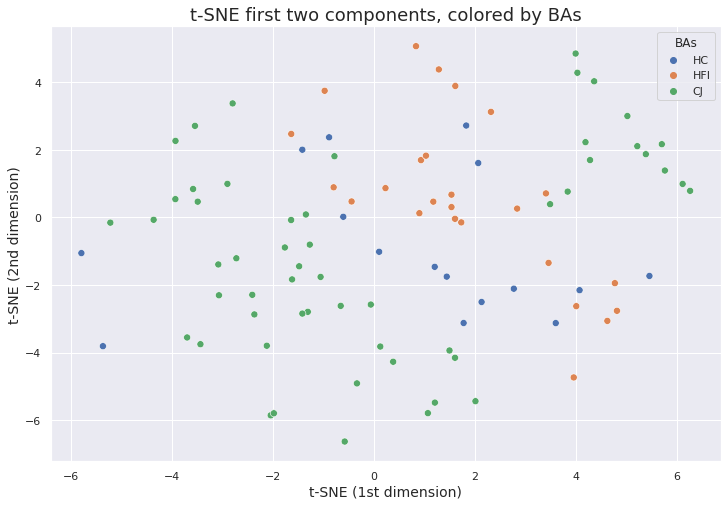

----------------------------------------------------------------------------------------------------


tSNE1  tSNE2
0   -5.80  -1.06
1    4.07  -2.15
2    3.60  -3.13
3    0.10  -1.02
4    2.13  -2.50
..    ...    ...
90  -1.31  -2.79
91  -1.42  -2.85
92  -3.50   0.47
93   4.03   4.28
94   3.49   0.39

[95 rows x 2 columns]

In [159]:
print(100 * '#', '\n')

matrix = X_imp_halfmin_log_std.copy()

X_imp_halfmin_log_std_PCA, explained_variance = perform_PCA(matrix, part_explained_variance=0.8)
print(f'Initial number of dimension : {matrix.shape[1]}')
print(f'Final number of dimension : {explained_variance.shape[0]}')
display(X_imp_halfmin_log_std_PCA)

print('\n', 100 * '#', '\n')

n_components = 2
X_imp_halfmin_log_std_PCA_tSNE = perform_tSNE(X_imp_halfmin_log_std_PCA, metadata=metadata, n_components=n_components, targets_plot=[target.name])
display(X_imp_halfmin_log_std_PCA_tSNE)

## b - Feature selection keeping all features with ANOVA pvalue $\lt \alpha \hspace{0.39cm}$

In [160]:
#target = peakTable['Disease']
matrix = X_imp_halfmin_log_std.copy()

X_imp_halfmin_log_std_fs_anova, feature_scores = select_best_features(matrix, target, alpha=0.01)
print(f'Initial number of dimension : {matrix.shape[1]}')
print(f'Final number of dimension : {feature_scores.shape[0]}')
display(feature_scores)
display(X_imp_halfmin_log_std_fs_anova)

Initial number of dimension : 52
Final number of dimension : 35


features  f_scores  p_values
15     7-DHCA    123.51      0.00
2       b-MCA     99.69      0.00
26      NorCA     90.06      0.00
3          CA     88.96      0.00
5         HCA     75.53      0.00
14     3-DHCA     64.42      0.00
1         ACA     64.34      0.00
16     7-KLCA     58.89      0.00
18       b-CA     49.21      0.00
21      b-UCA     45.10      0.00
19      b-DCA     43.77      0.00
4        CDCA     37.18      0.00
43    CA:CDCA     35.49      0.00
46    TDCA:CA     29.77      0.00
48  GLCA:CDCA     28.61      0.00
40       TLCA     27.10      0.00
0       a-MCA     26.92      0.00
30  CDCA-3Gln     20.67      0.00
29      w-MCA     18.16      0.00
6         GCA     15.68      0.00
37    T-w-MCA     15.27      0.00
22     b-UDCA     14.58      0.00
49  TLCA:CDCA     13.48      0.00
45    GDCA:CA     12.17      0.00
17     a-HDCA     11.36      0.00
36     LCA-3S     10.74      0.00
10        TCA      9.18      0.00
41    TLCA-3S      8.72      0.00
9     T-b-MCA      8.47      0.00
51   TDCA:DCA      8.09      0.00
25     muroCA      8.08      0.00
28       UDCA      6.57      0.00
8        GHCA      6.05      0.00
50   GDCA:DCA      5.51      0.01
12       THCA      5.11      0.01

0   7-DHCA  b-MCA  NorCA    CA   HCA  3-DHCA   ACA  7-KLCA  b-CA  b-UCA  ...  \
0     1.14   1.70   1.33  0.92  0.73    1.65  1.12    1.41  0.94   1.77  ...   
1     1.37   1.55   2.05  1.35  1.21    1.62  1.40    1.51  2.08   2.55  ...   
2     1.08   0.50   1.21  0.39  0.52    0.92  0.52    1.37  1.04   2.28  ...   
3     0.93   1.14   1.26  0.93  0.50    0.83  1.01    0.61  0.50   0.81  ...   
4     1.29   1.10   0.41  0.28  0.66    1.14  0.33    1.04  0.69   0.72  ...   
..     ...    ...    ...   ...   ...     ...   ...     ...   ...    ...  ...   
90   -0.46  -1.00  -0.99 -1.09 -0.81   -1.02 -0.47   -0.80 -0.76   0.15  ...   
91   -0.27  -0.80  -0.01 -0.26 -0.36   -0.01 -0.34   -0.67 -0.87  -0.66  ...   
92   -1.38  -0.86  -0.82 -0.60 -0.79   -0.88 -0.57   -1.00 -0.11  -0.86  ...   
93   -0.64   0.52   0.46  0.24 -0.01    0.09 -0.28    0.85  0.79   0.61  ...   
94   -0.68  -0.86  -0.89 -0.85 -1.03   -0.55 -1.24   -1.32 -0.32  -0.51  ...   

0   LCA-3S   TCA  TLCA-3S  T-b-MCA  TDCA:DCA  muroCA  UDCA  GHCA  GDCA:DCA  \
0    -0.35  2.25     0.74     1.14     -0.36    0.70  1.26  1.31     -1.07   
1     0.16  1.16     0.45     1.26     -0.64    0.33  1.41  1.12     -0.24   
2    -0.97 -0.18    -0.74    -0.71     -0.85   -1.45  1.24  0.34     -1.07   
3    -0.78  0.57     0.37     0.11      0.90    0.91  0.28  0.19      1.12   
4    -1.44 -0.16    -1.04    -1.55     -0.52   -0.27  0.06  0.28     -1.07   
..     ...   ...      ...      ...       ...     ...   ...   ...       ...   
90   -0.45 -1.25     0.12    -0.29     -0.01   -0.03  1.18 -1.45      0.54   
91   -0.18 -1.12     0.12    -0.41     -0.44    0.36 -1.19 -1.45      0.05   
92    0.25 -0.43     0.01    -0.07     -0.54   -0.18  0.66 -0.05     -0.11   
93   -0.61  0.60     0.98     0.21      0.81    0.18  1.28 -1.45     -0.20   
94   -0.57 -0.41    -1.12    -1.55     -0.55   -0.60 -0.68  0.19      0.15   

0   THCA  
0   1.55  
1   0.50  
2  -0.71  
3  -0.21  
4  -1.12  
..   ...  
90 -0.77  
91 -0.83  
92 -0.34  
93  0.57  
94 -0.10  

[95 rows x 35 columns]

## c - Feature selection keeping a specific number of features

### Keeping 10 features

In [161]:
#target = peakTable['Disease']
matrix = X_imp_halfmin_log_std.copy()

X_imp_halfmin_log_std_fs_nb_10, feature_scores = select_best_features(matrix, target, k=10)
print(f'Initial number of dimension : {matrix.shape[1]}')
print(f'Final number of dimension : {feature_scores.shape[0]}')
display(feature_scores)
display(X_imp_halfmin_log_std_fs_nb_10)

Initial number of dimension : 52
Final number of dimension : 10


features  f_scores  p_values
15   7-DHCA    123.51      0.00
2     b-MCA     99.69      0.00
26    NorCA     90.06      0.00
3        CA     88.96      0.00
5       HCA     75.53      0.00
14   3-DHCA     64.42      0.00
1       ACA     64.34      0.00
16   7-KLCA     58.89      0.00
18     b-CA     49.21      0.00
21    b-UCA     45.10      0.00

0   7-DHCA  b-MCA  NorCA    CA   HCA  3-DHCA   ACA  7-KLCA  b-CA  b-UCA
0     1.14   1.70   1.33  0.92  0.73    1.65  1.12    1.41  0.94   1.77
1     1.37   1.55   2.05  1.35  1.21    1.62  1.40    1.51  2.08   2.55
2     1.08   0.50   1.21  0.39  0.52    0.92  0.52    1.37  1.04   2.28
3     0.93   1.14   1.26  0.93  0.50    0.83  1.01    0.61  0.50   0.81
4     1.29   1.10   0.41  0.28  0.66    1.14  0.33    1.04  0.69   0.72
..     ...    ...    ...   ...   ...     ...   ...     ...   ...    ...
90   -0.46  -1.00  -0.99 -1.09 -0.81   -1.02 -0.47   -0.80 -0.76   0.15
91   -0.27  -0.80  -0.01 -0.26 -0.36   -0.01 -0.34   -0.67 -0.87  -0.66
92   -1.38  -0.86  -0.82 -0.60 -0.79   -0.88 -0.57   -1.00 -0.11  -0.86
93   -0.64   0.52   0.46  0.24 -0.01    0.09 -0.28    0.85  0.79   0.61
94   -0.68  -0.86  -0.89 -0.85 -1.03   -0.55 -1.24   -1.32 -0.32  -0.51

[95 rows x 10 columns]

######################################################################################################################################################


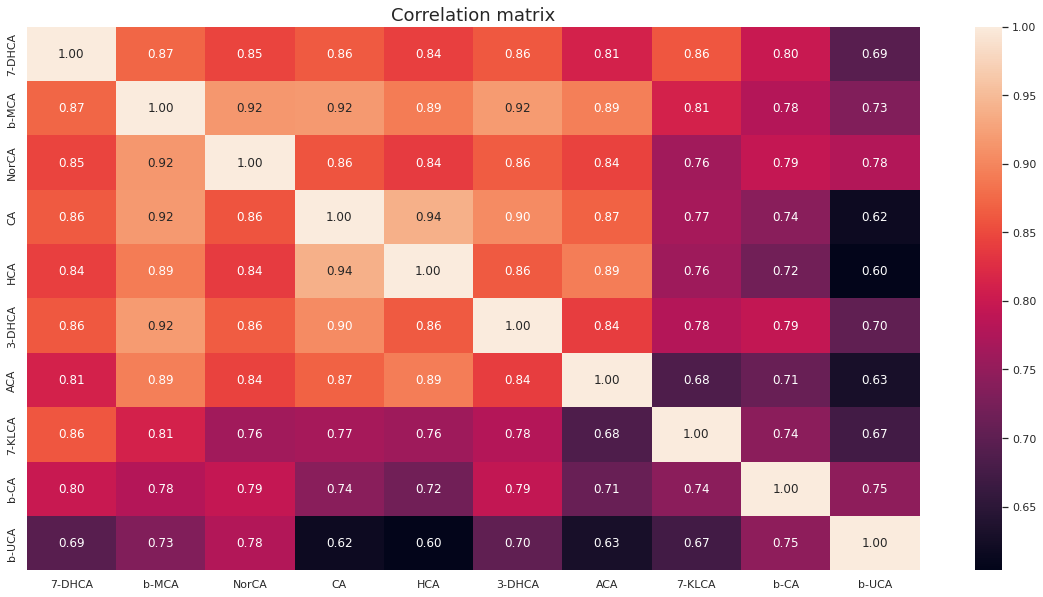

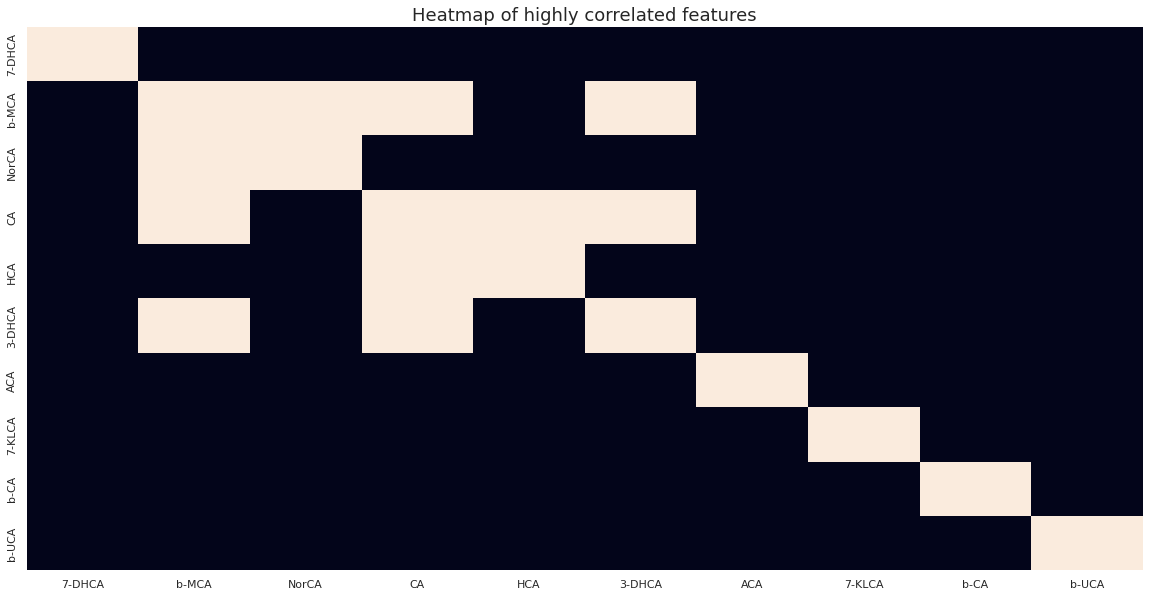



###################################################################################################################################################### 



In [162]:
matrix = pd.concat([target, X_imp_halfmin_log_std_fs_nb_10], axis=1)
plot_correlation_matrix(matrix, threshold=0.9, annot=True, fmt='.2f')

### Keeping 5 features

In [163]:
#target = peakTable['Disease']
matrix = X_imp_halfmin_log_std.copy()

X_imp_halfmin_log_std_fs_nb_5, feature_scores = select_best_features(matrix, target, k=5)
print(f'Initial number of dimension : {matrix.shape[1]}')
print(f'Final number of dimension : {feature_scores.shape[0]}')
display(feature_scores)
display(X_imp_halfmin_log_std_fs_nb_5)

Initial number of dimension : 52
Final number of dimension : 5


features  f_scores  p_values
15   7-DHCA    123.51      0.00
2     b-MCA     99.69      0.00
26    NorCA     90.06      0.00
3        CA     88.96      0.00
5       HCA     75.53      0.00

0   7-DHCA  b-MCA  NorCA    CA   HCA
0     1.14   1.70   1.33  0.92  0.73
1     1.37   1.55   2.05  1.35  1.21
2     1.08   0.50   1.21  0.39  0.52
3     0.93   1.14   1.26  0.93  0.50
4     1.29   1.10   0.41  0.28  0.66
..     ...    ...    ...   ...   ...
90   -0.46  -1.00  -0.99 -1.09 -0.81
91   -0.27  -0.80  -0.01 -0.26 -0.36
92   -1.38  -0.86  -0.82 -0.60 -0.79
93   -0.64   0.52   0.46  0.24 -0.01
94   -0.68  -0.86  -0.89 -0.85 -1.03

[95 rows x 5 columns]

######################################################################################################################################################


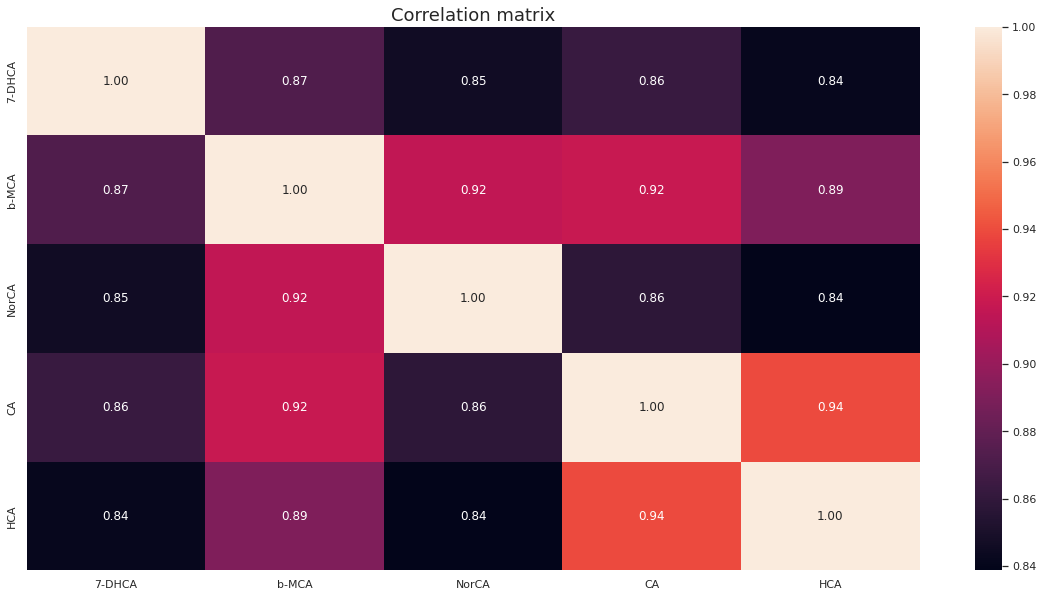

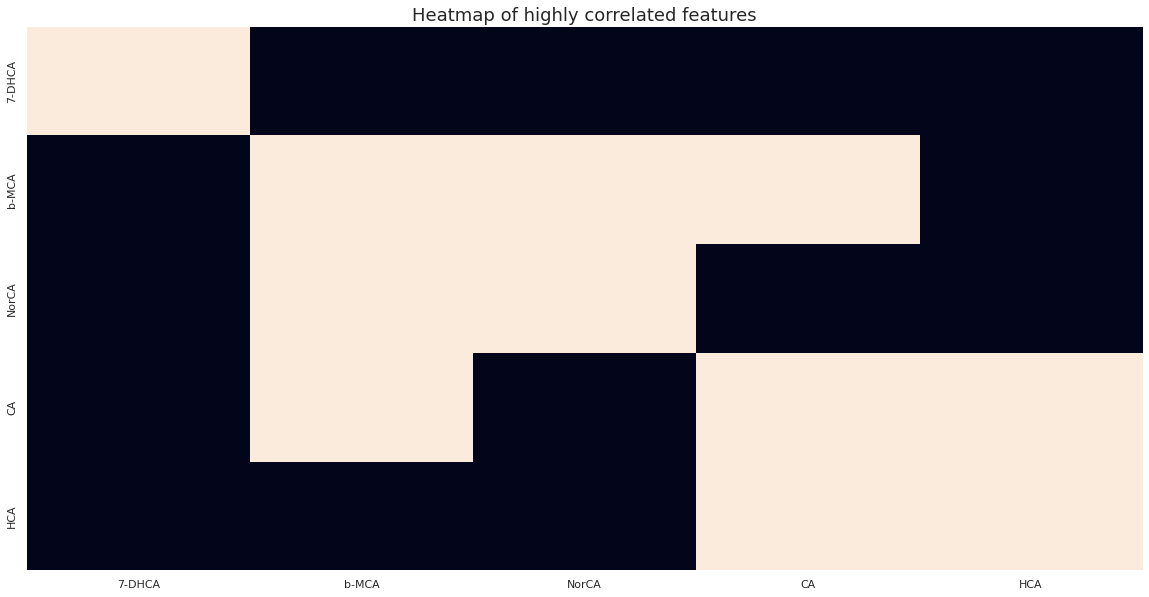



###################################################################################################################################################### 



In [164]:
matrix = pd.concat([target, X_imp_halfmin_log_std_fs_nb_5], axis=1)
plot_correlation_matrix(matrix, threshold=0.9, annot=True, fmt='.2f')

### Keeping 1 feature

In [165]:
#target = peakTable['Disease']
matrix = X_imp_halfmin_log_std.copy()

X_imp_halfmin_log_std_fs_nb_1, feature_scores = select_best_features(matrix, target, k=1)
print(f'Initial number of dimension : {matrix.shape[1]}')
print(f'Final number of dimension : {feature_scores.shape[0]}')
display(feature_scores)
display(X_imp_halfmin_log_std_fs_nb_1)

Initial number of dimension : 52
Final number of dimension : 1


features  f_scores  p_values
15   7-DHCA    123.51      0.00

0   7-DHCA
0     1.14
1     1.37
2     1.08
3     0.93
4     1.29
..     ...
90   -0.46
91   -0.27
92   -1.38
93   -0.64
94   -0.68

[95 rows x 1 columns]

#### For further analysis, we have the following reduced dataframes :
- <code>X_imp_halfmin_log_std_PCA</code> : reduced peak table with PCA keeping 95% of initial explained variance
- <code>X_imp_halfmin_log_std_PCA_tSNE</code> : reduced peak table with PCA as before + t-SNE reduction to keep only 2 components
- <code>X_imp_halfmin_log_std_fs_anova</code> : reduced peak table by keeping all features with ANOVA pvalue $\lt \alpha \hspace{0.39cm}$
- <code>peakTable_Agilent_imp_std_fs_nb_N</code> : reduced peak table by keeping a specific number of features (with $N=\{1;5;10\}$ here)

# 5 - Classification

In [166]:
from classification_functions import *

In [167]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

## a - Launch pipeline with differently preprocessed dataframes

In [168]:
# target =

### with <code>X_imp_halfmin_log_std_PCA</code>

#################################################################-----------------###################################################################
################################################################| RidgeClassifier |##################################################################
#################################################################-----------------###################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   3    0
HFI         0   3    2


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.50    1.00      0.67     3.00
HFI                1.00    0.40      0.57     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.83    0.80      0.75    19.00
weighted avg       0.92    0.84      0.83    19.00

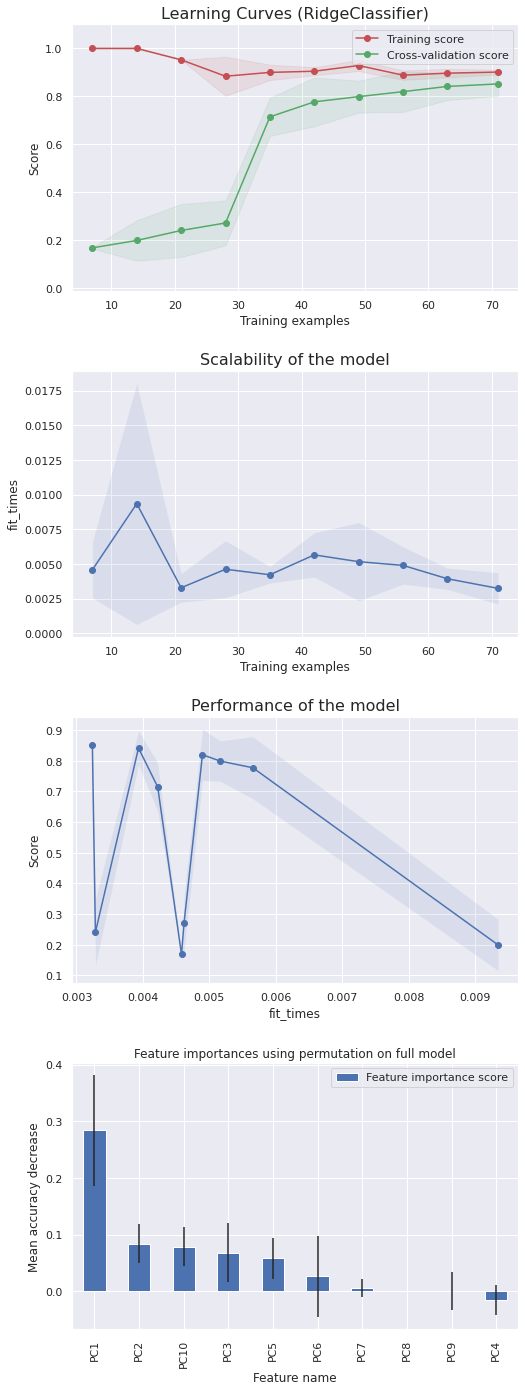




################################################################--------------------#################################################################
###############################################################| LogisticRegression |################################################################
################################################################--------------------#################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   3    0
HFI         0   3    2


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.50    1.00      0.67     3.00
HFI                1.00    0.40      0.57     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.83    0.80      0.75    19.00
weighted avg       0.92    0.84      0.83    19.00

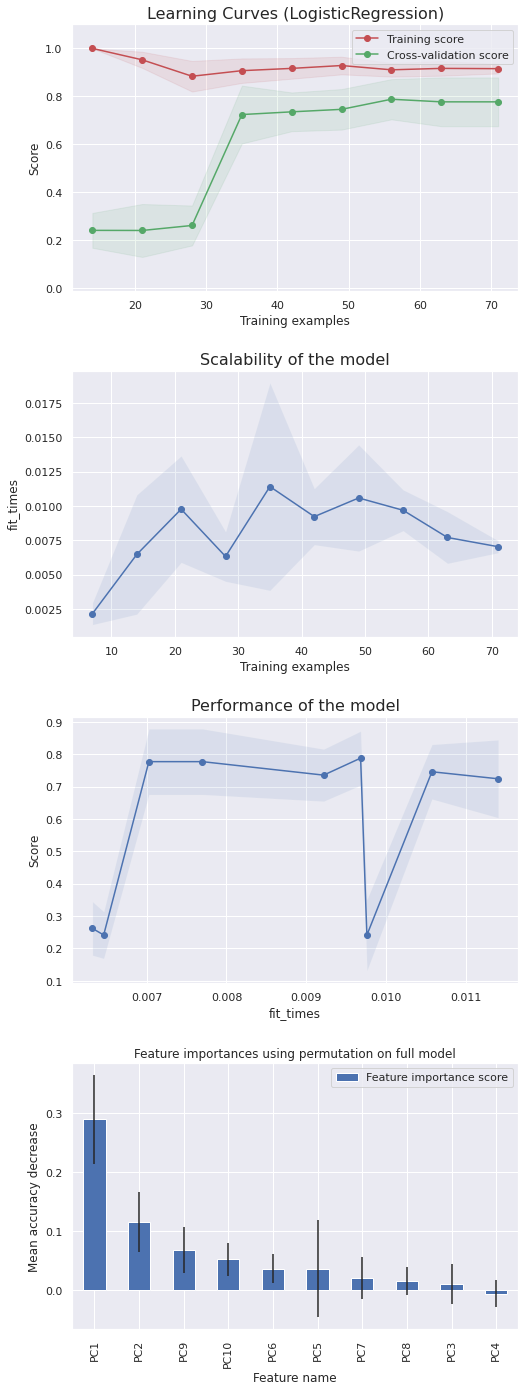




############################################################----------------------------#############################################################
###########################################################| LinearDiscriminantAnalysis |############################################################
############################################################----------------------------#############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   3    0
HFI         0   3    2


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.50    1.00      0.67     3.00
HFI                1.00    0.40      0.57     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.83    0.80      0.75    19.00
weighted avg       0.92    0.84      0.83    19.00

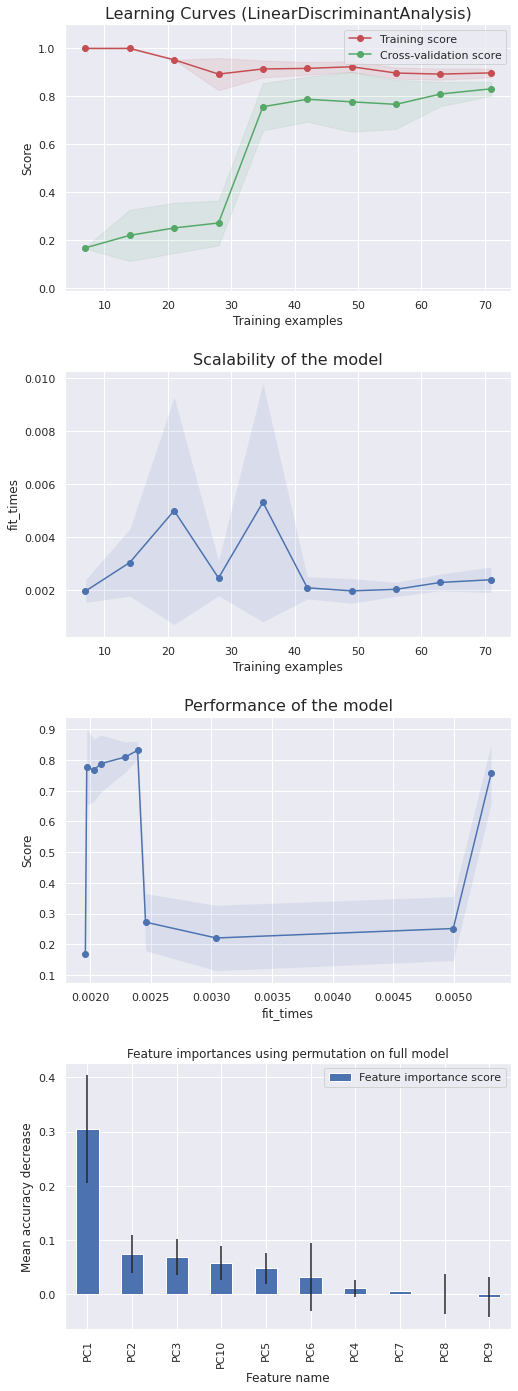




#######################################################################-----#########################################################################
######################################################################| SVC |########################################################################
#######################################################################-----#########################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          1   1    1
HFI         0   1    4


Classification report :


precision  recall  f1-score  support
CJ                 0.92    1.00      0.96    11.00
HC                 0.50    0.33      0.40     3.00
HFI                0.80    0.80      0.80     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.74    0.71      0.72    19.00
weighted avg       0.82    0.84      0.83    19.00

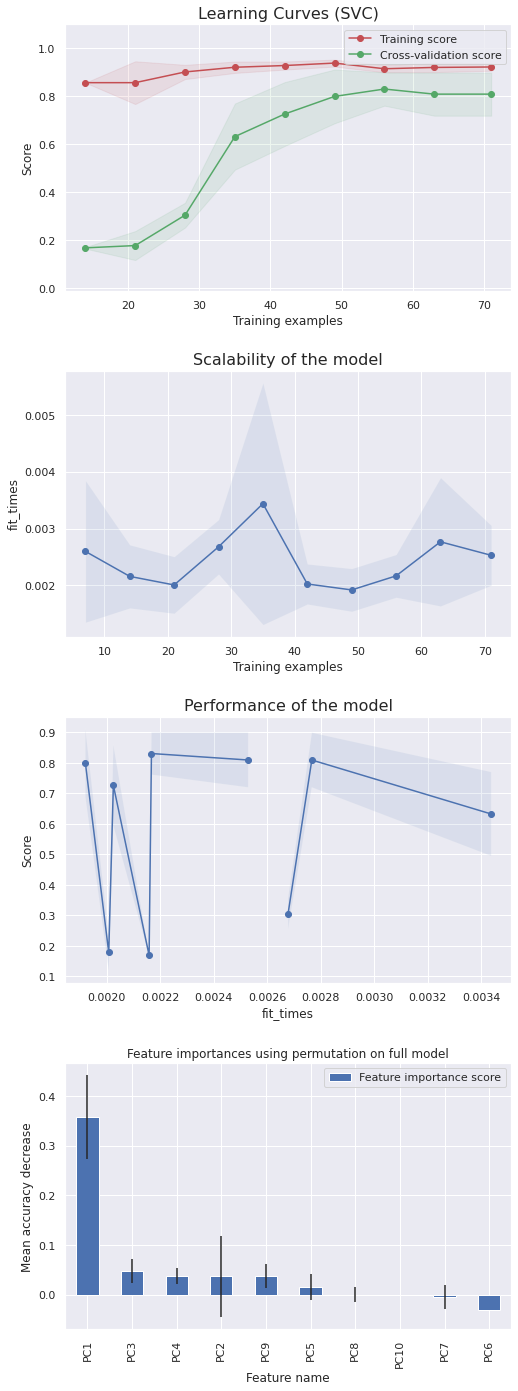




##################################################################---------------####################################################################
#################################################################| SGDClassifier |###################################################################
##################################################################---------------####################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   3    0
HFI         0   3    2


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.50    1.00      0.67     3.00
HFI                1.00    0.40      0.57     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.83    0.80      0.75    19.00
weighted avg       0.92    0.84      0.83    19.00

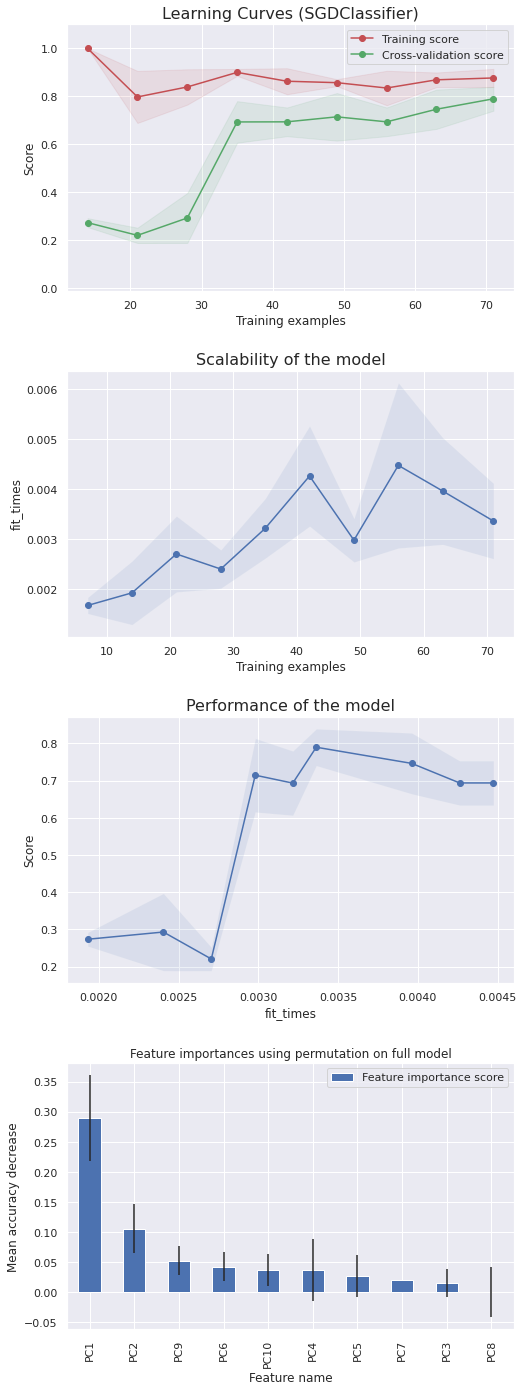




###############################################################----------------------################################################################
##############################################################| KNeighborsClassifier |###############################################################
###############################################################----------------------################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   2    1
HFI         0   1    4


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.67    0.67      0.67     3.00
HFI                0.80    0.80      0.80     5.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.82    0.82      0.82    19.00
weighted avg       0.89    0.89      0.89    19.00

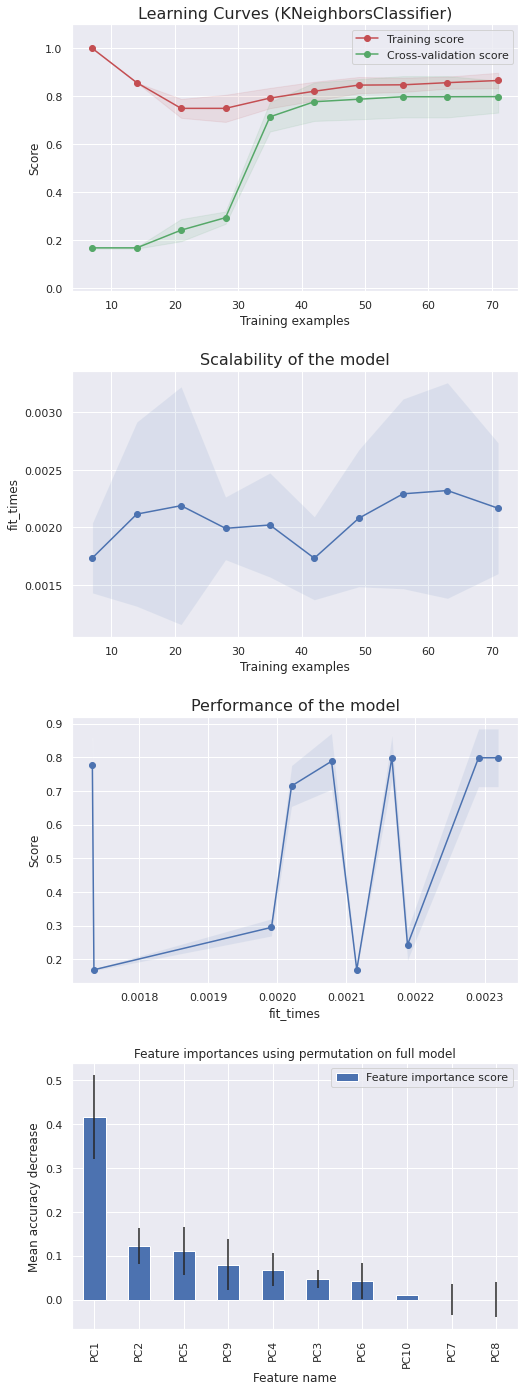




#################################################################-----------------###################################################################
################################################################| NearestCentroid |##################################################################
#################################################################-----------------###################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   3    0
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.60    1.00      0.75     3.00
HFI                1.00    0.60      0.75     5.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.87    0.87      0.83    19.00
weighted avg       0.94    0.89      0.89    19.00

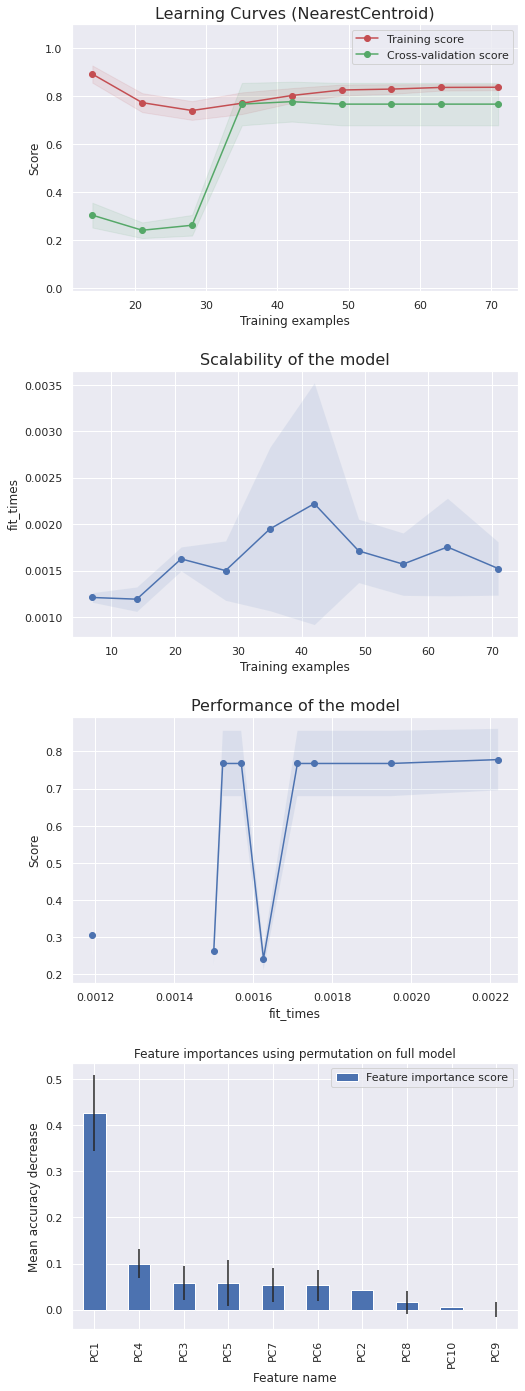




############################################################---------------------------##############################################################
###########################################################| GaussianProcessClassifier |#############################################################
############################################################---------------------------##############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          1   0    2
HFI         0   0    5


Classification report :


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



precision  recall  f1-score  support
CJ                 0.92    1.00      0.96    11.00
HC                 0.00    0.00      0.00     3.00
HFI                0.71    1.00      0.83     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.54    0.67      0.60    19.00
weighted avg       0.72    0.84      0.77    19.00

/opt/conda/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


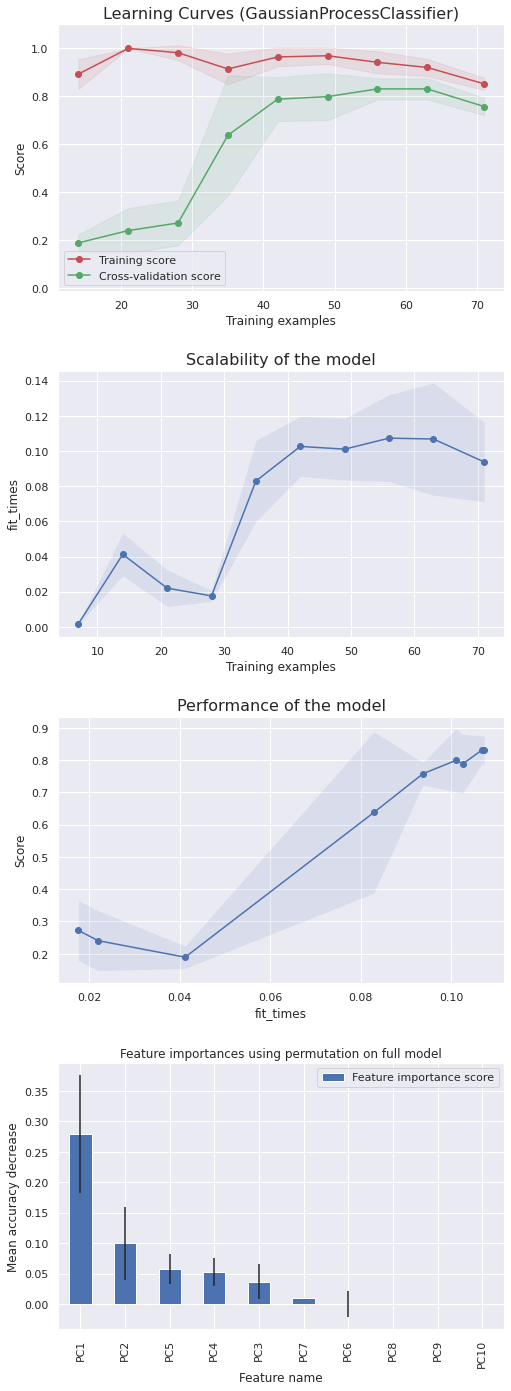




####################################################################------------#####################################################################
###################################################################| GaussianNB |####################################################################
####################################################################------------#####################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          1   2    0
HFI         1   2    2


Classification report :


precision  recall  f1-score  support
CJ                 0.85    1.00      0.92    11.00
HC                 0.50    0.67      0.57     3.00
HFI                1.00    0.40      0.57     5.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.78    0.69      0.69    19.00
weighted avg       0.83    0.79      0.77    19.00

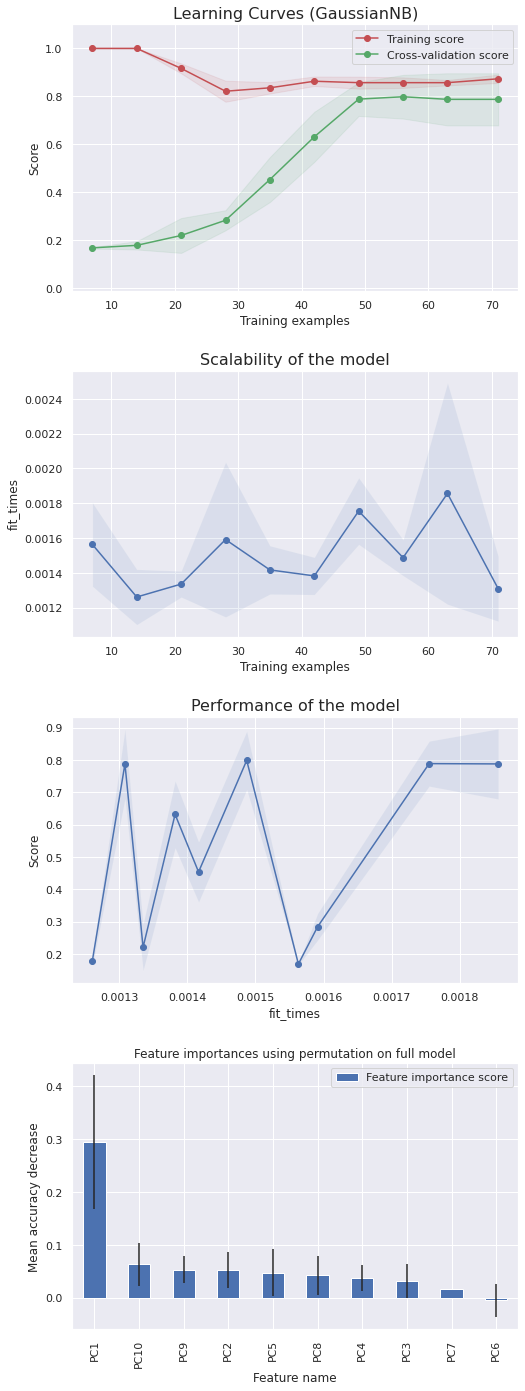




##############################################################------------------------###############################################################
#############################################################| DecisionTreeClassifier |##############################################################
##############################################################------------------------###############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          1   1    1
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 0.92    1.00      0.96    11.00
HC                 0.33    0.33      0.33     3.00
HFI                0.75    0.60      0.67     5.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.67    0.64      0.65    19.00
weighted avg       0.78    0.79      0.78    19.00

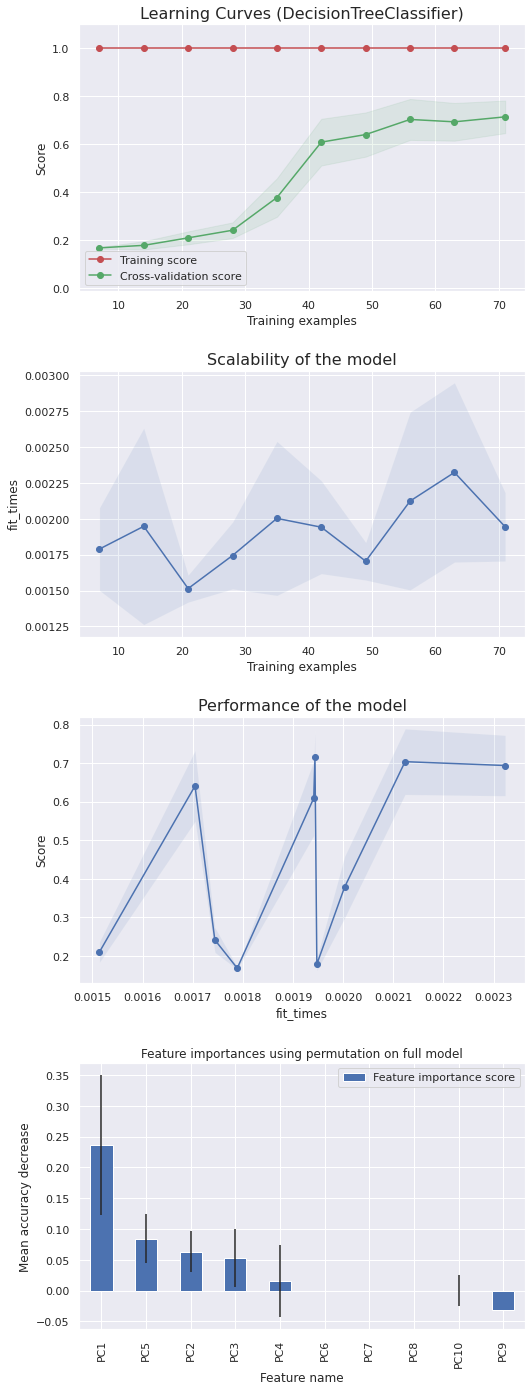




##############################################################------------------------###############################################################
#############################################################| RandomForestClassifier |##############################################################
##############################################################------------------------###############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          2   0    1
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 0.85    1.00      0.92    11.00
HC                 0.00    0.00      0.00     3.00
HFI                0.75    0.60      0.67     5.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.53    0.53      0.53    19.00
weighted avg       0.69    0.74      0.71    19.00

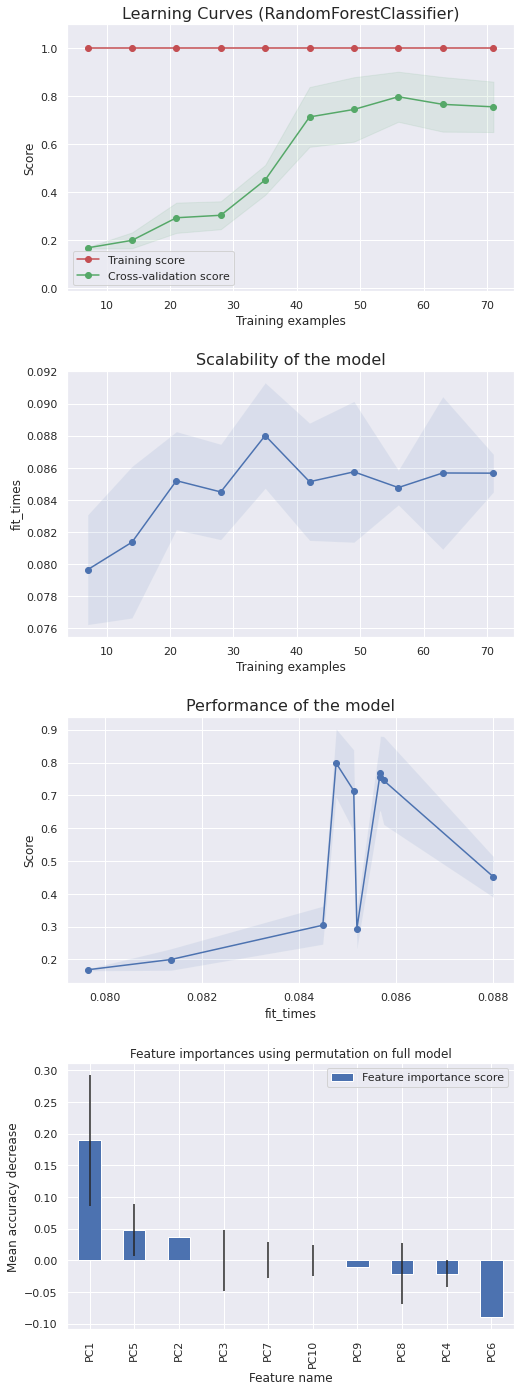




###############################################################----------------------################################################################
##############################################################| ExtraTreesClassifier |###############################################################
###############################################################----------------------################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          1   1    1
HFI         0   3    2


Classification report :


precision  recall  f1-score  support
CJ                 0.92    1.00      0.96    11.00
HC                 0.25    0.33      0.29     3.00
HFI                0.67    0.40      0.50     5.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.61    0.58      0.58    19.00
weighted avg       0.75    0.74      0.73    19.00

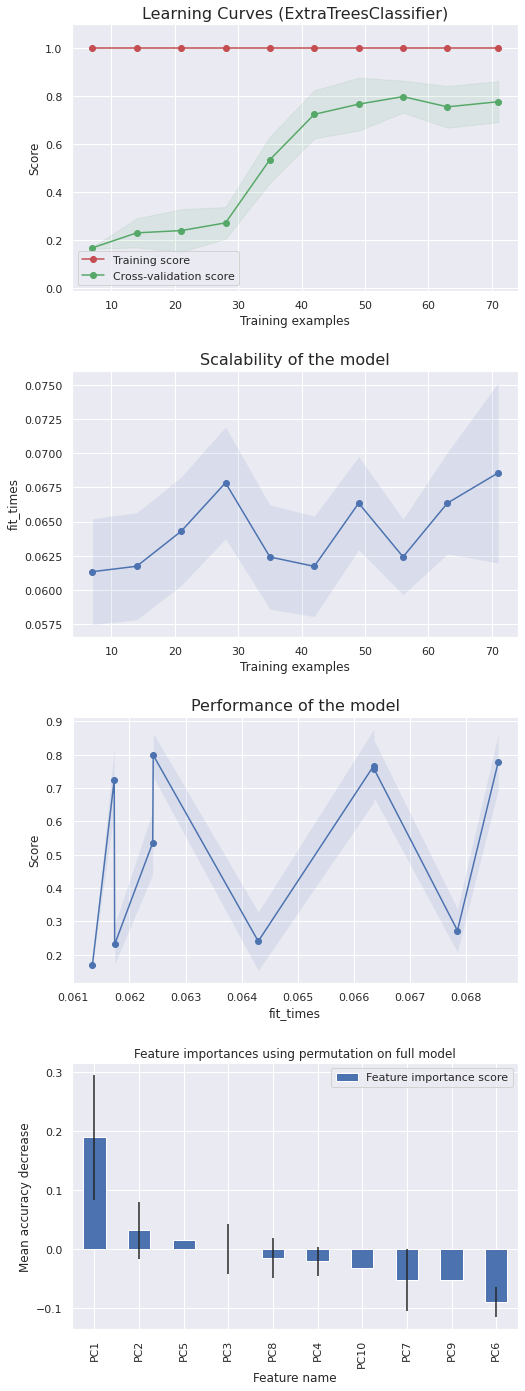




################################################################--------------------#################################################################
###############################################################| AdaBoostClassifier |################################################################
################################################################--------------------#################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ          9   0    2
HC          2   0    1
HFI         1   1    3


Classification report :


precision  recall  f1-score  support
CJ                 0.75    0.82      0.78    11.00
HC                 0.00    0.00      0.00     3.00
HFI                0.50    0.60      0.55     5.00
accuracy           0.63    0.63      0.63     0.63
macro avg          0.42    0.47      0.44    19.00
weighted avg       0.57    0.63      0.60    19.00

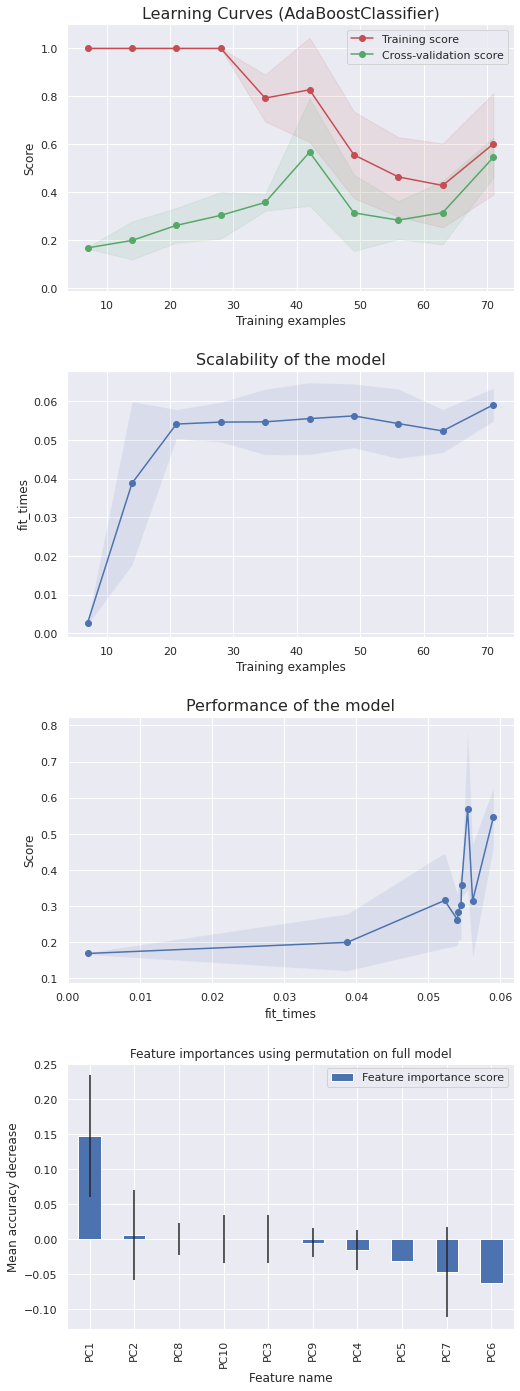




############################################################----------------------------#############################################################
###########################################################| GradientBoostingClassifier |############################################################
############################################################----------------------------#############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          2   0    1
HFI         1   1    3


Classification report :


precision  recall  f1-score  support
CJ                 0.79    1.00      0.88    11.00
HC                 0.00    0.00      0.00     3.00
HFI                0.75    0.60      0.67     5.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.51    0.53      0.52    19.00
weighted avg       0.65    0.74      0.68    19.00

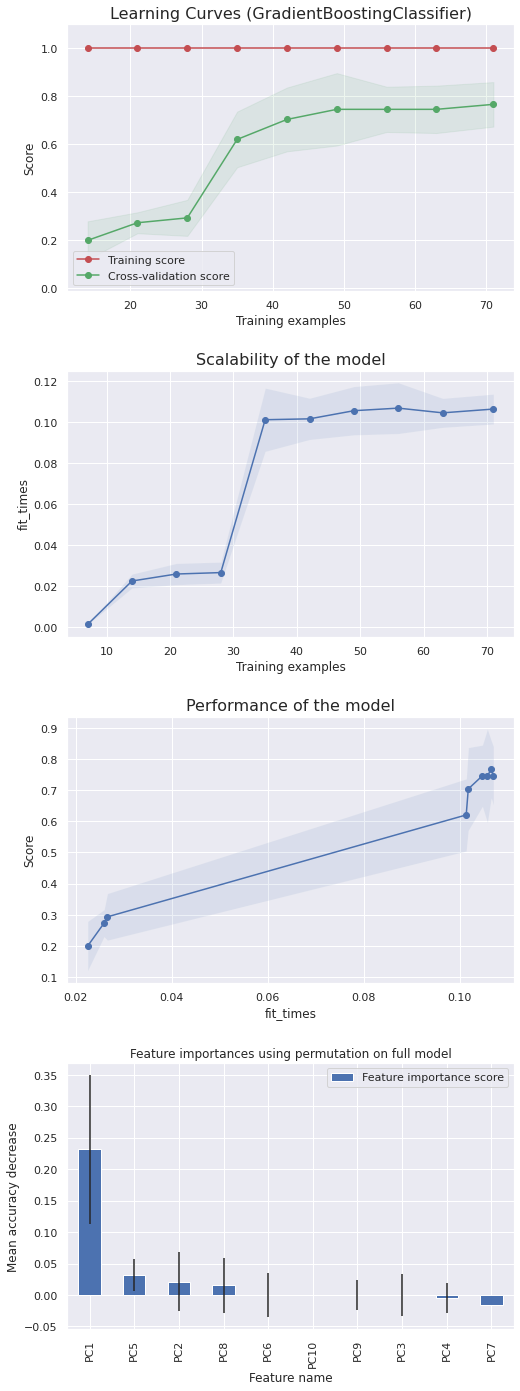




##########################################################--------------------------------###########################################################
#########################################################| HistGradientBoostingClassifier |##########################################################
##########################################################--------------------------------###########################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          1   1    1
HFI         0   1    4


Classification report :


precision  recall  f1-score  support
CJ                 0.92    1.00      0.96    11.00
HC                 0.50    0.33      0.40     3.00
HFI                0.80    0.80      0.80     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.74    0.71      0.72    19.00
weighted avg       0.82    0.84      0.83    19.00

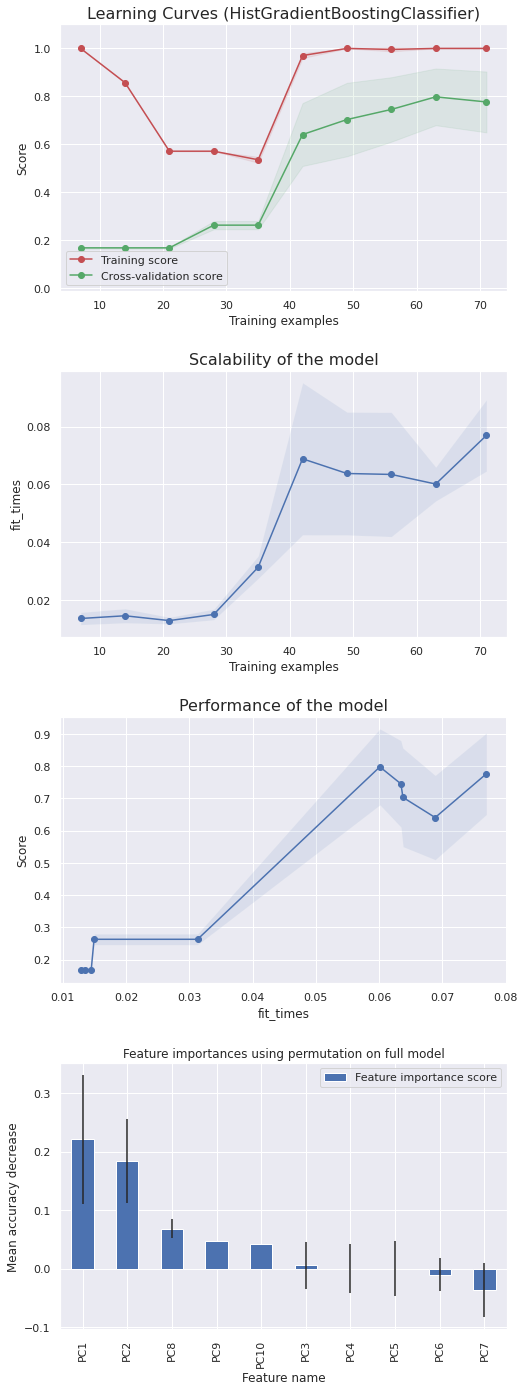




##################################################################---------------####################################################################
#################################################################| MLPClassifier |###################################################################
##################################################################---------------####################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   3    0
HFI         0   1    4


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.75    1.00      0.86     3.00
HFI                1.00    0.80      0.89     5.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.92    0.93      0.92    19.00
weighted avg       0.96    0.95      0.95    19.00

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


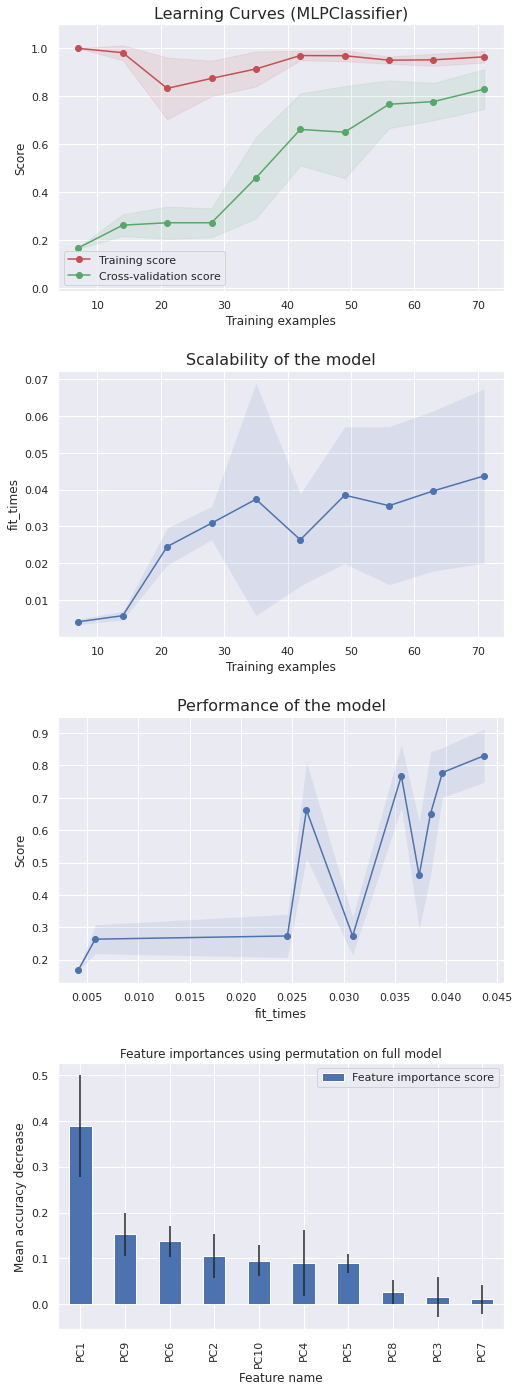




###################################################################################################################################################### 



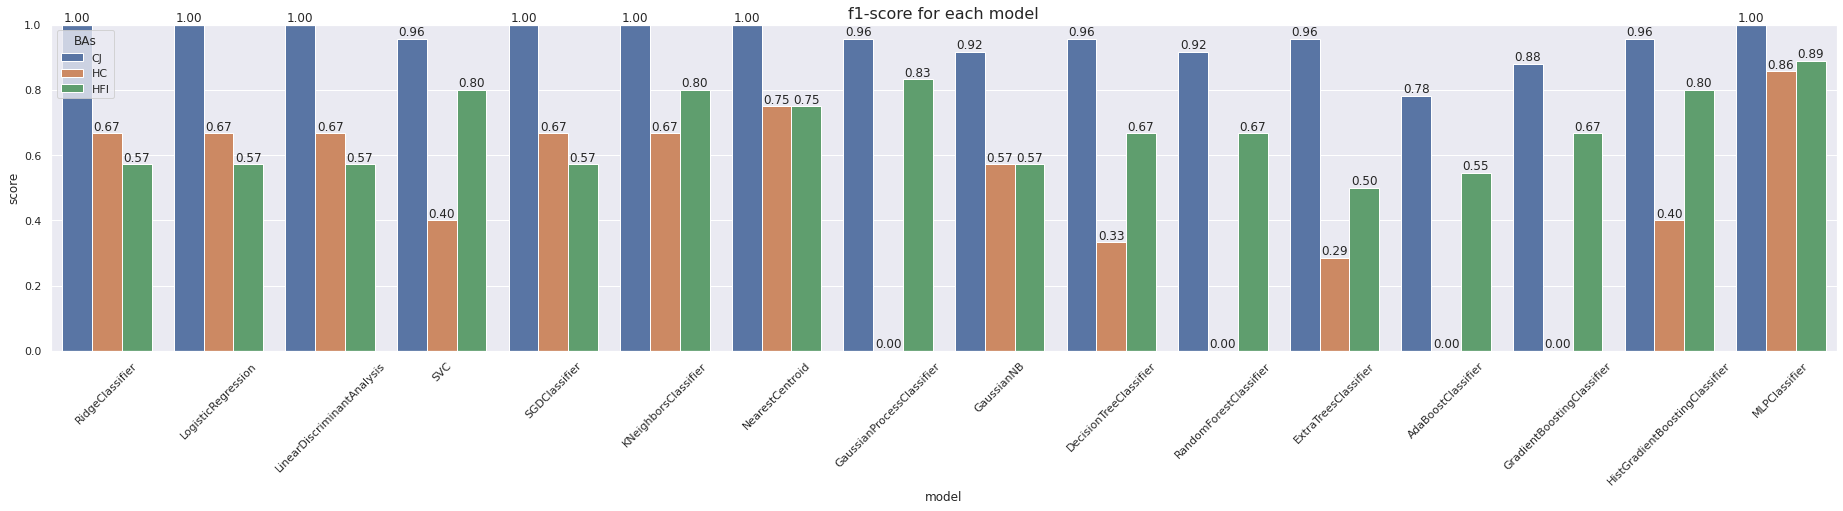


 ######################################################################################################################################################

Time to compute : 00h00m23s

 ######################################################################################################################################################






In [169]:
# Initialise models
RidgeClassifier_ = RidgeClassifier()
LogisticRegression_ = LogisticRegression()
LinearDiscriminantAnalysis_ = LinearDiscriminantAnalysis()
SVC_ = SVC(random_state=0)
SGDClassifier_ = SGDClassifier()
KNeighborsClassifier_ = KNeighborsClassifier()
NearestCentroid_ = NearestCentroid()
GaussianProcessClassifier_ = GaussianProcessClassifier(kernel=1.0 * RBF(1.0))
GaussianNB_ = GaussianNB()
DecisionTreeClassifier_ = DecisionTreeClassifier(random_state=0)
RandomForestClassifier_ = RandomForestClassifier(random_state=0)
ExtraTreesClassifier_ = ExtraTreesClassifier(random_state=0)
AdaBoostClassifier_ = AdaBoostClassifier(random_state=0)
GradientBoostingClassifier_ = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
HistGradientBoostingClassifier_ = HistGradientBoostingClassifier(max_iter=100)
MLPClassifier_ = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=300, random_state=1)


# Create dict with all models
dict_models = {'RidgeClassifier': RidgeClassifier_,
               'LogisticRegression': LogisticRegression_,
               'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis_,
               'SVC': SVC_,
               'SGDClassifier': SGDClassifier_,
               'KNeighborsClassifier': KNeighborsClassifier_,
               'NearestCentroid': NearestCentroid_,
               'GaussianProcessClassifier': GaussianProcessClassifier_,
               'GaussianNB': GaussianNB_,
               'DecisionTreeClassifier': DecisionTreeClassifier_,
               'RandomForestClassifier': RandomForestClassifier_,
               'ExtraTreesClassifier': ExtraTreesClassifier_,
               'AdaBoostClassifier': AdaBoostClassifier_,
               'GradientBoostingClassifier': GradientBoostingClassifier_,
               'HistGradientBoostingClassifier': HistGradientBoostingClassifier_,
               'MLPClassifier': MLPClassifier_
              }


# Launch classification pipeline
df_scores, dict_df_feature_importance = pipeline_classification(X=X_imp_halfmin_log_std_PCA, y=target,
                                                                dict_models=dict_models, plot_each_model=True, plot_hist_score=True, score='f1-score')

In [170]:
print()

### with <code>X_imp_halfmin_log_std_fs_nb_10</code>

#################################################################-----------------###################################################################
################################################################| RidgeClassifier |##################################################################
#################################################################-----------------###################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   1    2
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.33    0.33      0.33     3.00
HFI                0.60    0.60      0.60     5.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.64    0.64      0.64    19.00
weighted avg       0.79    0.79      0.79    19.00

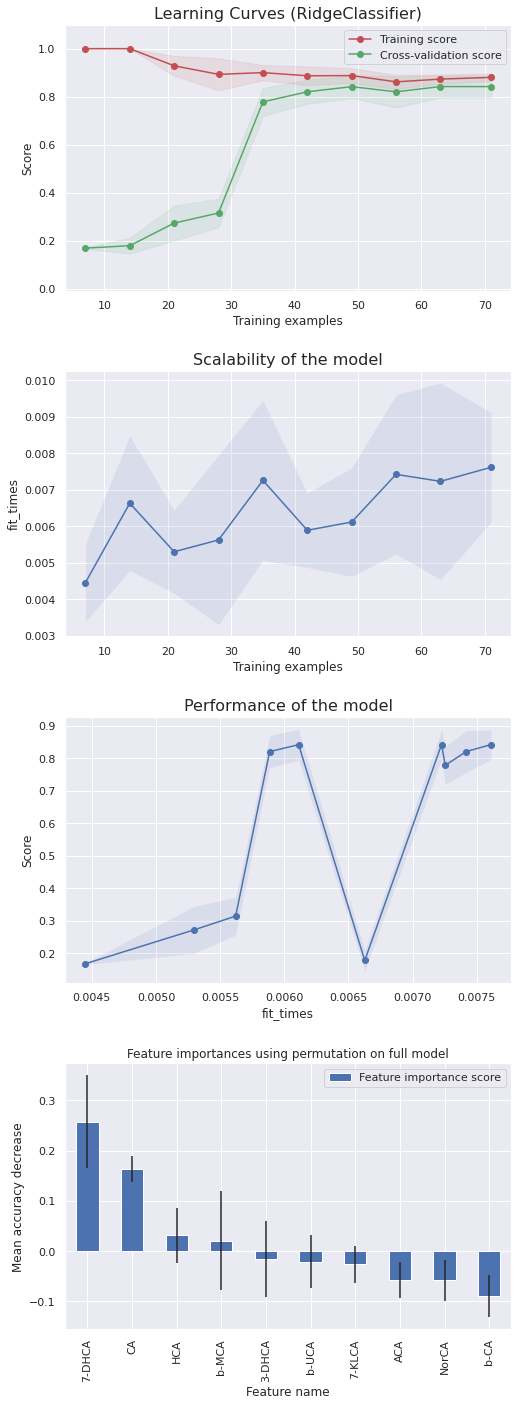




################################################################--------------------#################################################################
###############################################################| LogisticRegression |################################################################
################################################################--------------------#################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   1    2
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.33    0.33      0.33     3.00
HFI                0.60    0.60      0.60     5.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.64    0.64      0.64    19.00
weighted avg       0.79    0.79      0.79    19.00

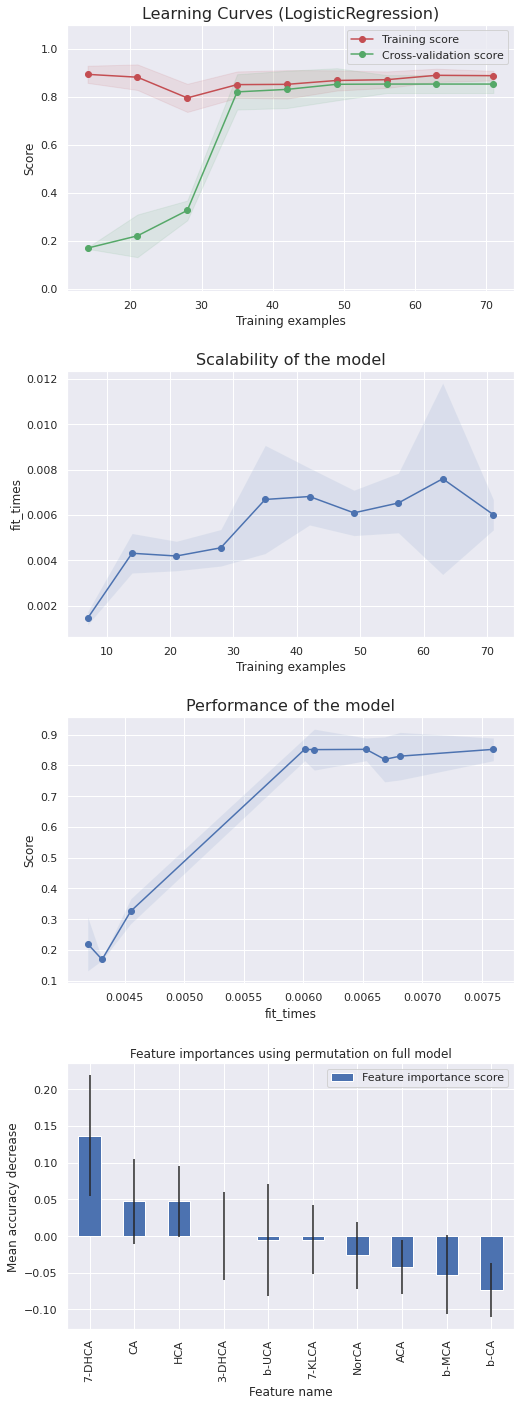




############################################################----------------------------#############################################################
###########################################################| LinearDiscriminantAnalysis |############################################################
############################################################----------------------------#############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   1    2
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.33    0.33      0.33     3.00
HFI                0.60    0.60      0.60     5.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.64    0.64      0.64    19.00
weighted avg       0.79    0.79      0.79    19.00

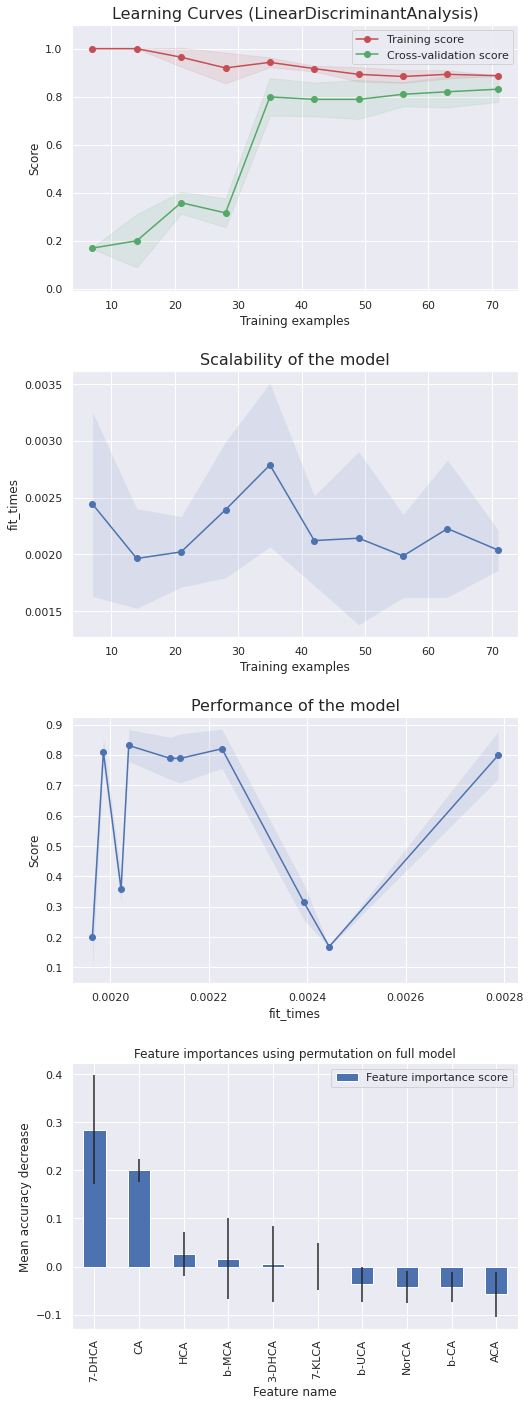




#######################################################################-----#########################################################################
######################################################################| SVC |########################################################################
#######################################################################-----#########################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   1    2
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.33    0.33      0.33     3.00
HFI                0.60    0.60      0.60     5.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.64    0.64      0.64    19.00
weighted avg       0.79    0.79      0.79    19.00

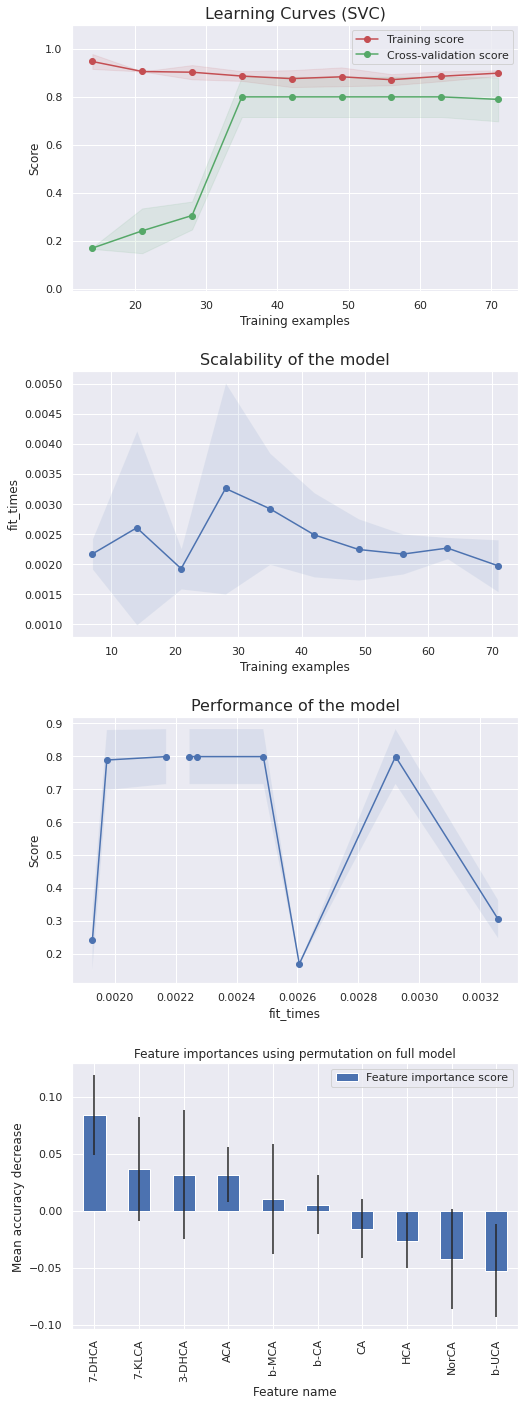




##################################################################---------------####################################################################
#################################################################| SGDClassifier |###################################################################
##################################################################---------------####################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         10   0    1
HC          0   3    0
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    0.91      0.95    11.00
HC                 0.60    1.00      0.75     3.00
HFI                0.75    0.60      0.67     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.78    0.84      0.79    19.00
weighted avg       0.87    0.84      0.85    19.00

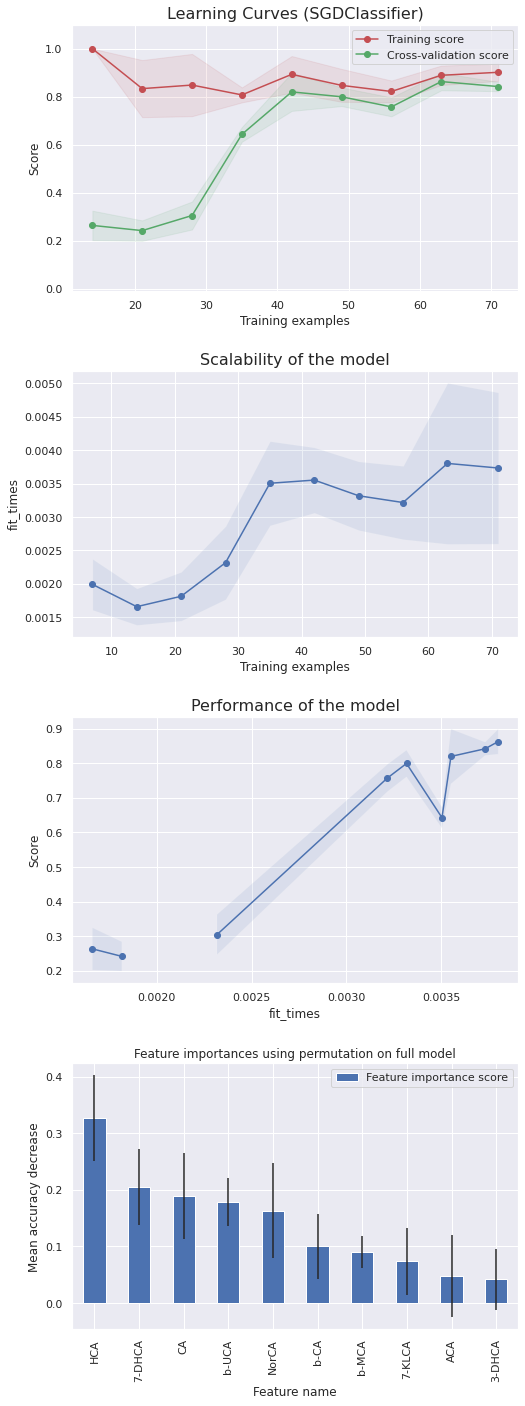




###############################################################----------------------################################################################
##############################################################| KNeighborsClassifier |###############################################################
###############################################################----------------------################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   3    0
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.60    1.00      0.75     3.00
HFI                1.00    0.60      0.75     5.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.87    0.87      0.83    19.00
weighted avg       0.94    0.89      0.89    19.00

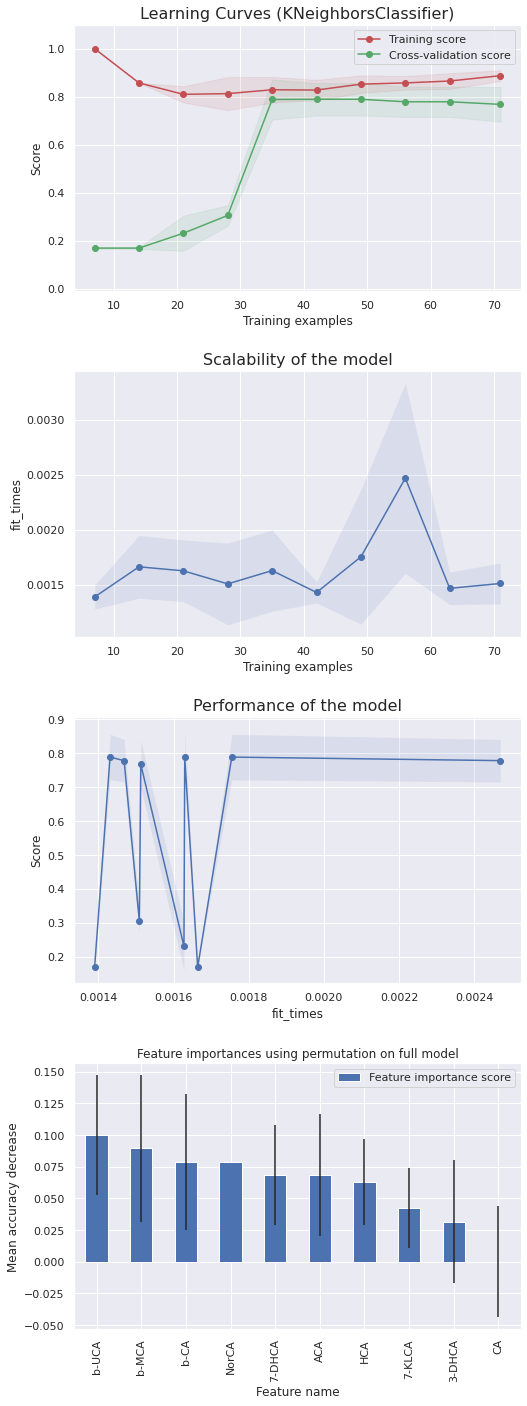




#################################################################-----------------###################################################################
################################################################| NearestCentroid |##################################################################
#################################################################-----------------###################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   1    2
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.33    0.33      0.33     3.00
HFI                0.60    0.60      0.60     5.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.64    0.64      0.64    19.00
weighted avg       0.79    0.79      0.79    19.00

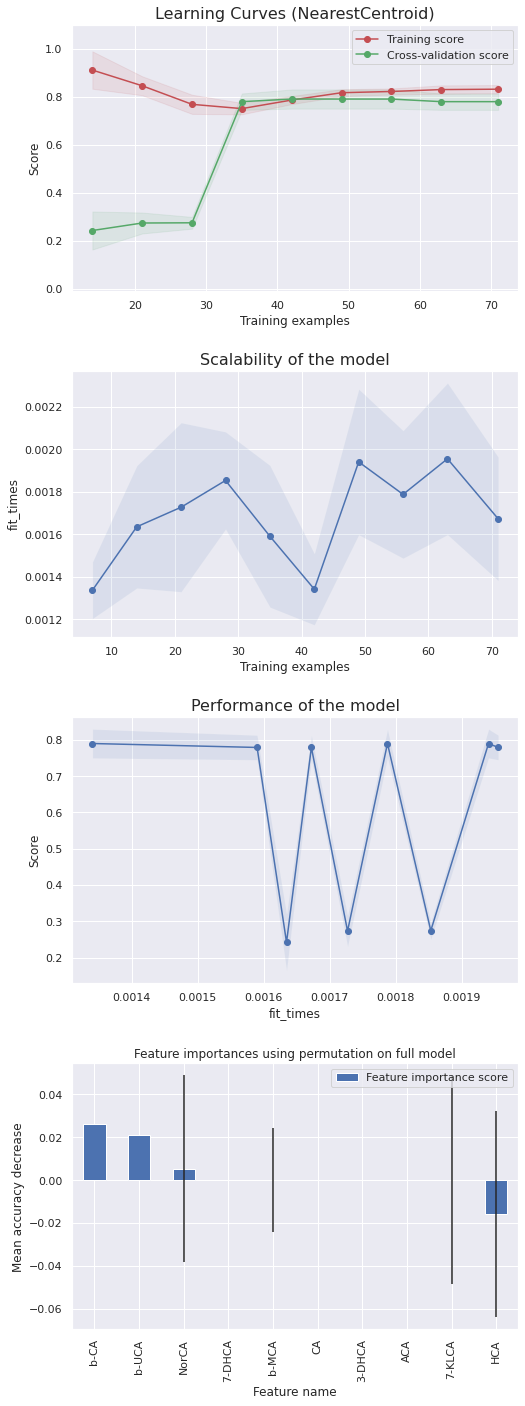




############################################################---------------------------##############################################################
###########################################################| GaussianProcessClassifier |#############################################################
############################################################---------------------------##############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   0    3
HFI         0   0    5


Classification report :


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.00    0.00      0.00     3.00
HFI                0.62    1.00      0.77     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.54    0.67      0.59    19.00
weighted avg       0.74    0.84      0.78    19.00

/opt/conda/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


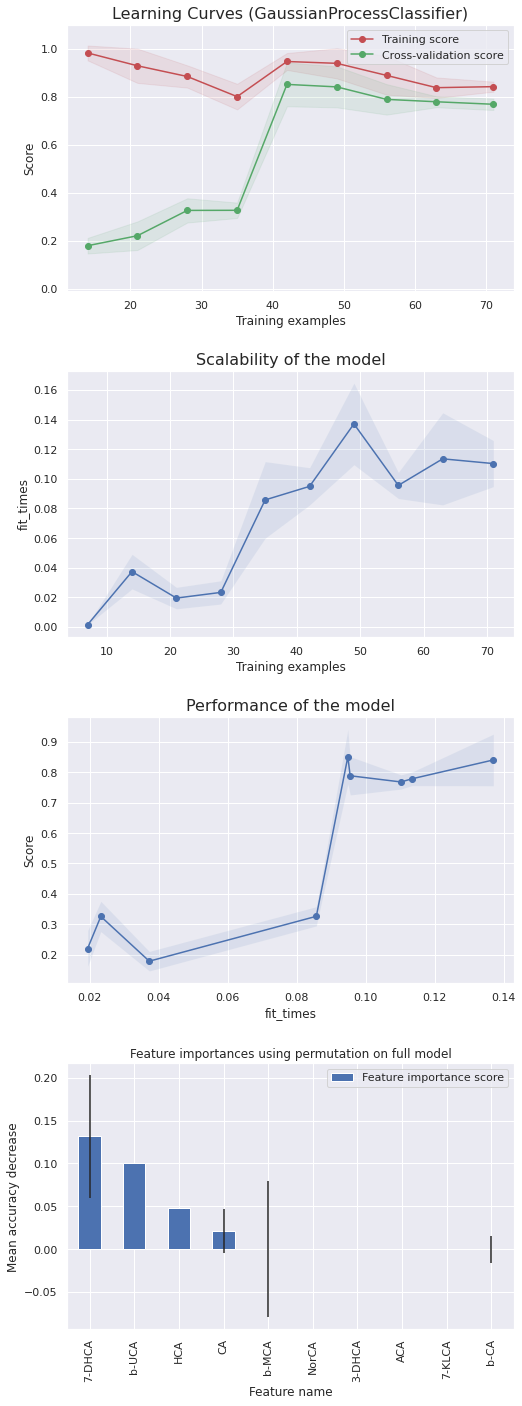




####################################################################------------#####################################################################
###################################################################| GaussianNB |####################################################################
####################################################################------------#####################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   2    1
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.50    0.67      0.57     3.00
HFI                0.75    0.60      0.67     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.75    0.76      0.75    19.00
weighted avg       0.86    0.84      0.84    19.00

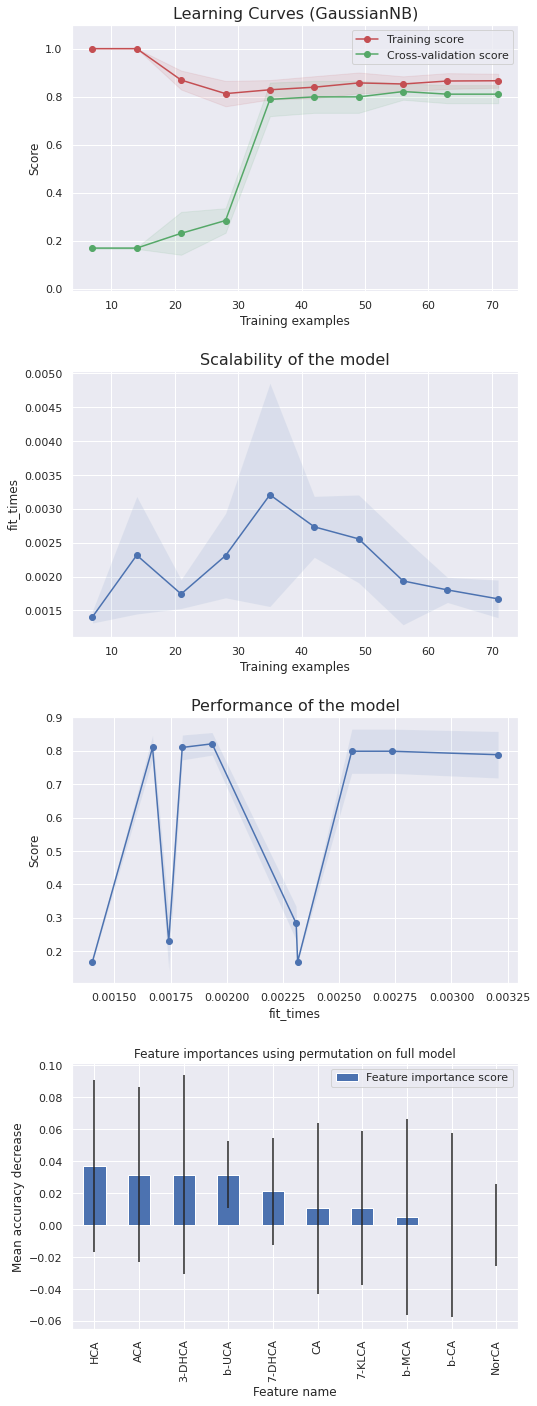




##############################################################------------------------###############################################################
#############################################################| DecisionTreeClassifier |##############################################################
##############################################################------------------------###############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   2    1
HFI         1   1    3


Classification report :


precision  recall  f1-score  support
CJ                 0.92    1.00      0.96    11.00
HC                 0.67    0.67      0.67     3.00
HFI                0.75    0.60      0.67     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.78    0.76      0.76    19.00
weighted avg       0.83    0.84      0.83    19.00

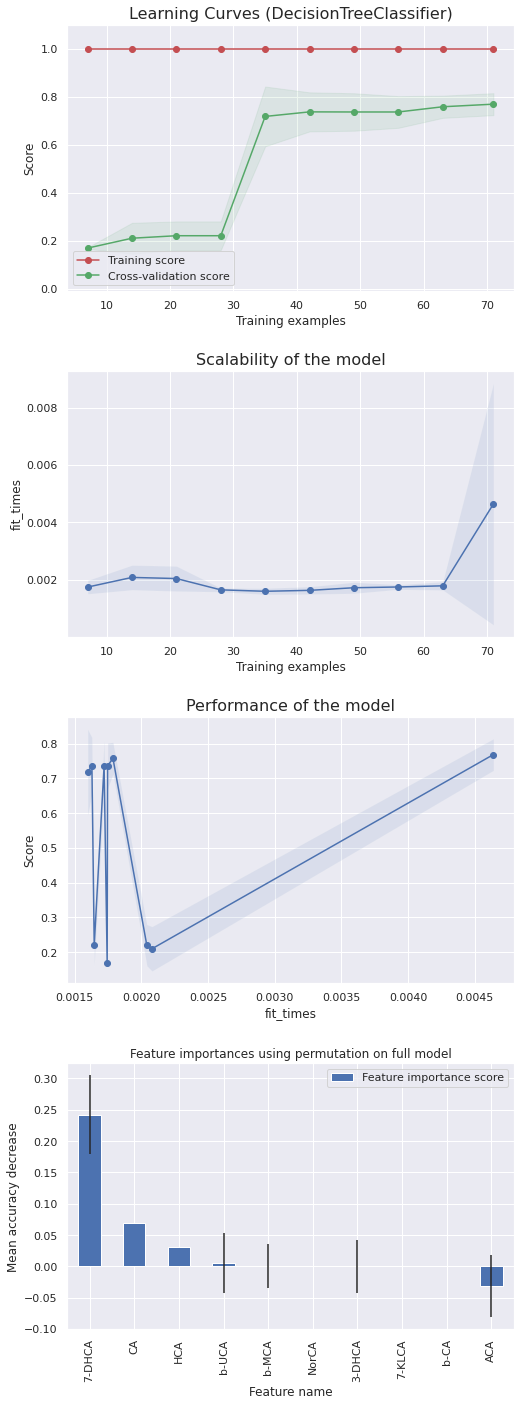




##############################################################------------------------###############################################################
#############################################################| RandomForestClassifier |##############################################################
##############################################################------------------------###############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   2    1
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.50    0.67      0.57     3.00
HFI                0.75    0.60      0.67     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.75    0.76      0.75    19.00
weighted avg       0.86    0.84      0.84    19.00

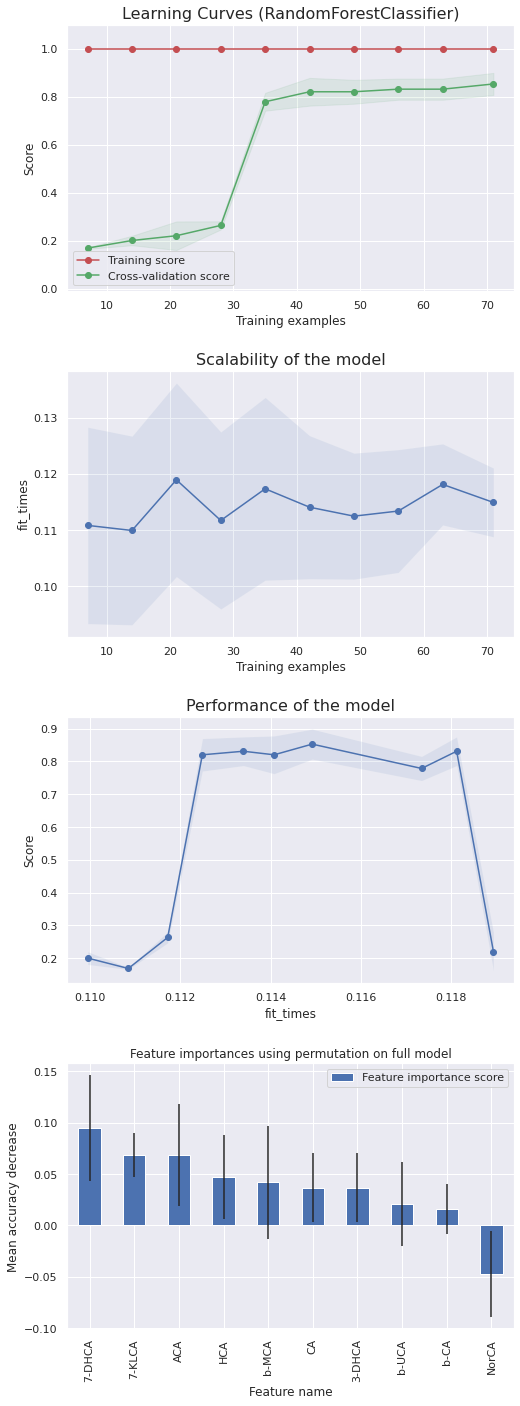




###############################################################----------------------################################################################
##############################################################| ExtraTreesClassifier |###############################################################
###############################################################----------------------################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   3    0
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.60    1.00      0.75     3.00
HFI                1.00    0.60      0.75     5.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.87    0.87      0.83    19.00
weighted avg       0.94    0.89      0.89    19.00

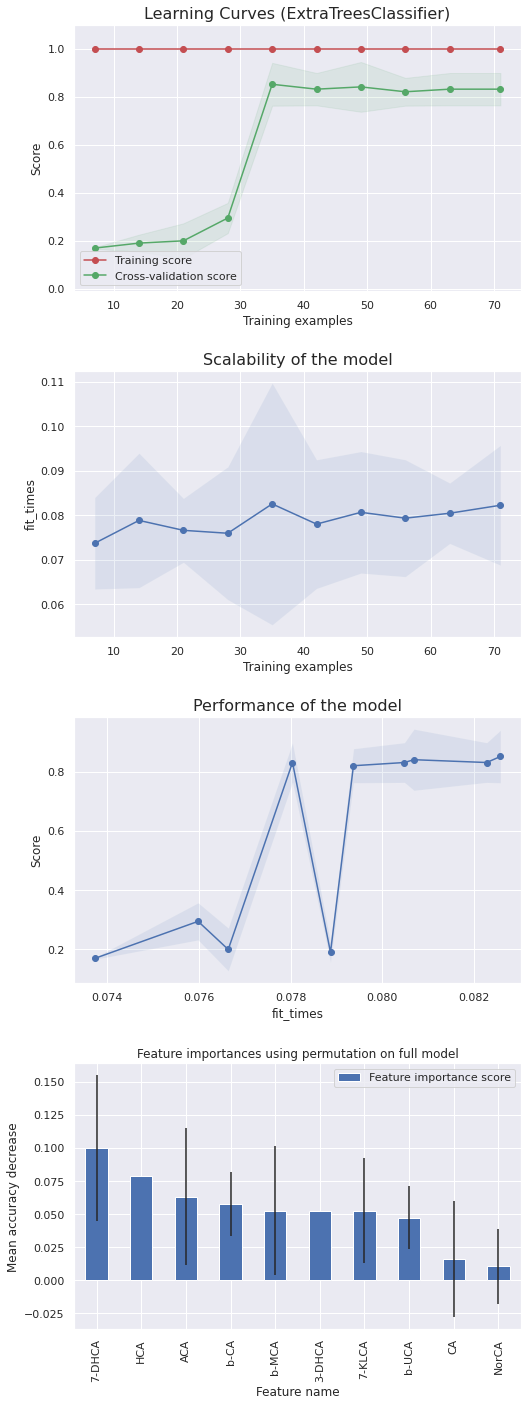




################################################################--------------------#################################################################
###############################################################| AdaBoostClassifier |################################################################
################################################################--------------------#################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   1    2
HFI         0   2    3


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.33    0.33      0.33     3.00
HFI                0.60    0.60      0.60     5.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.64    0.64      0.64    19.00
weighted avg       0.79    0.79      0.79    19.00

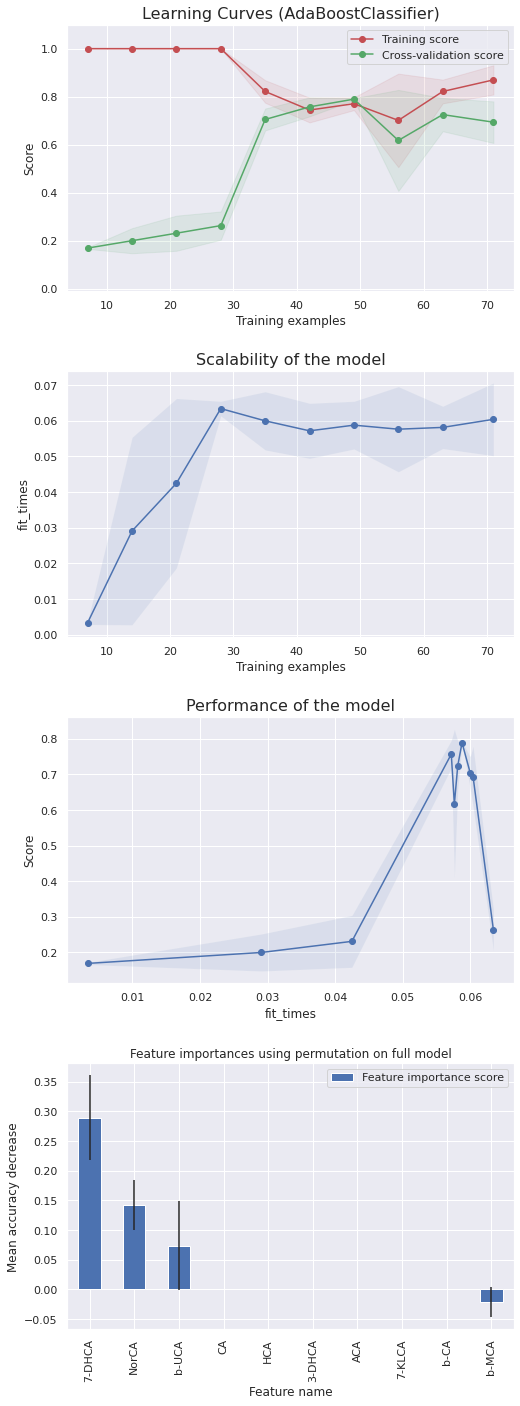




############################################################----------------------------#############################################################
###########################################################| GradientBoostingClassifier |############################################################
############################################################----------------------------#############################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   0    3
HFI         0   4    1


Classification report :


precision  recall  f1-score  support
CJ                 1.00    1.00      1.00    11.00
HC                 0.00    0.00      0.00     3.00
HFI                0.25    0.20      0.22     5.00
accuracy           0.63    0.63      0.63     0.63
macro avg          0.42    0.40      0.41    19.00
weighted avg       0.64    0.63      0.64    19.00

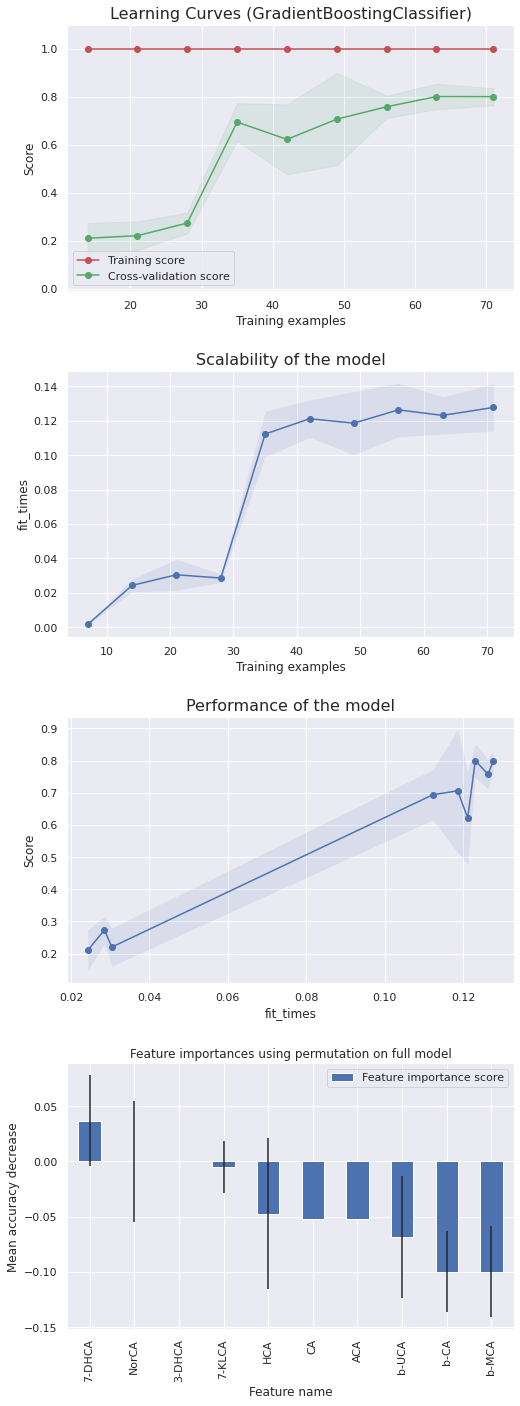




##########################################################--------------------------------###########################################################
#########################################################| HistGradientBoostingClassifier |##########################################################
##########################################################--------------------------------###########################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          0   2    1
HFI         1   2    2


Classification report :


precision  recall  f1-score  support
CJ                 0.92    1.00      0.96    11.00
HC                 0.50    0.67      0.57     3.00
HFI                0.67    0.40      0.50     5.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.69    0.69      0.68    19.00
weighted avg       0.79    0.79      0.78    19.00

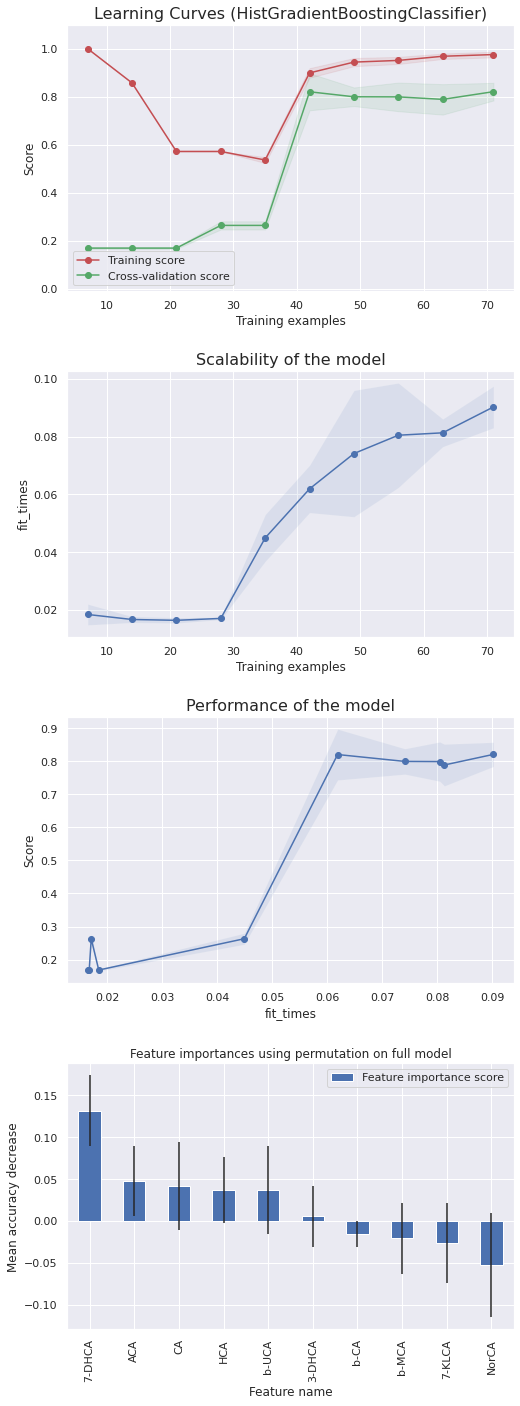




##################################################################---------------####################################################################
#################################################################| MLPClassifier |###################################################################
##################################################################---------------####################################################################

Corresponding classes to labels : {'CJ': 0, 'HC': 1, 'HFI': 2}

Confusion matrix :


CJ  HC  HFI
true/pred             
CJ         11   0    0
HC          1   1    1
HFI         0   1    4


Classification report :


precision  recall  f1-score  support
CJ                 0.92    1.00      0.96    11.00
HC                 0.50    0.33      0.40     3.00
HFI                0.80    0.80      0.80     5.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.74    0.71      0.72    19.00
weighted avg       0.82    0.84      0.83    19.00

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


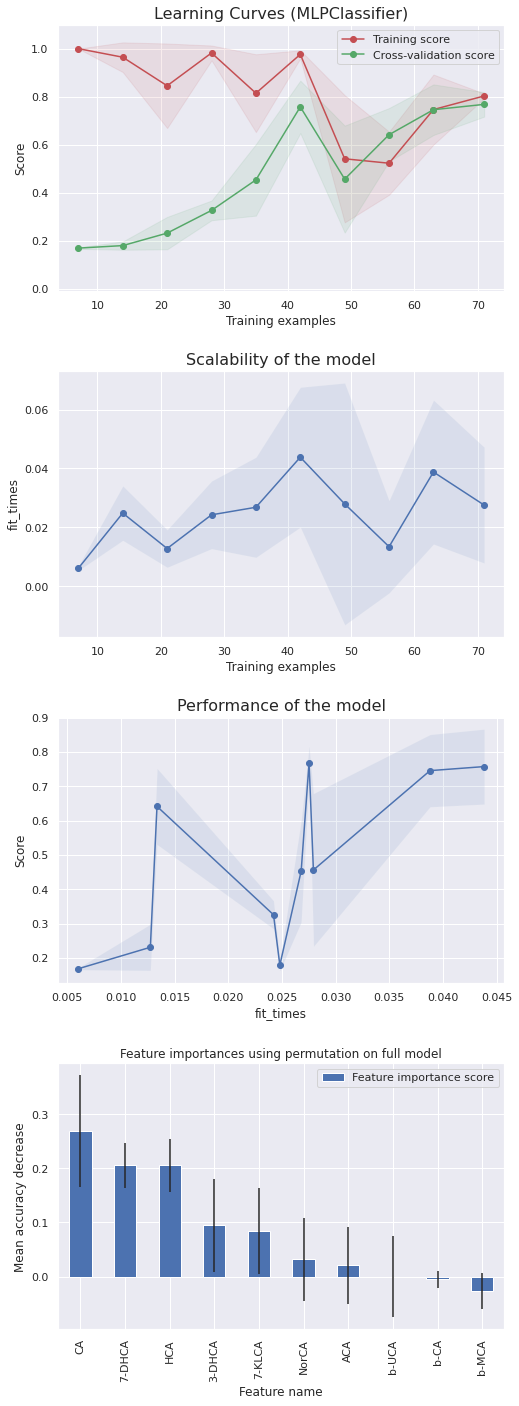




###################################################################################################################################################### 



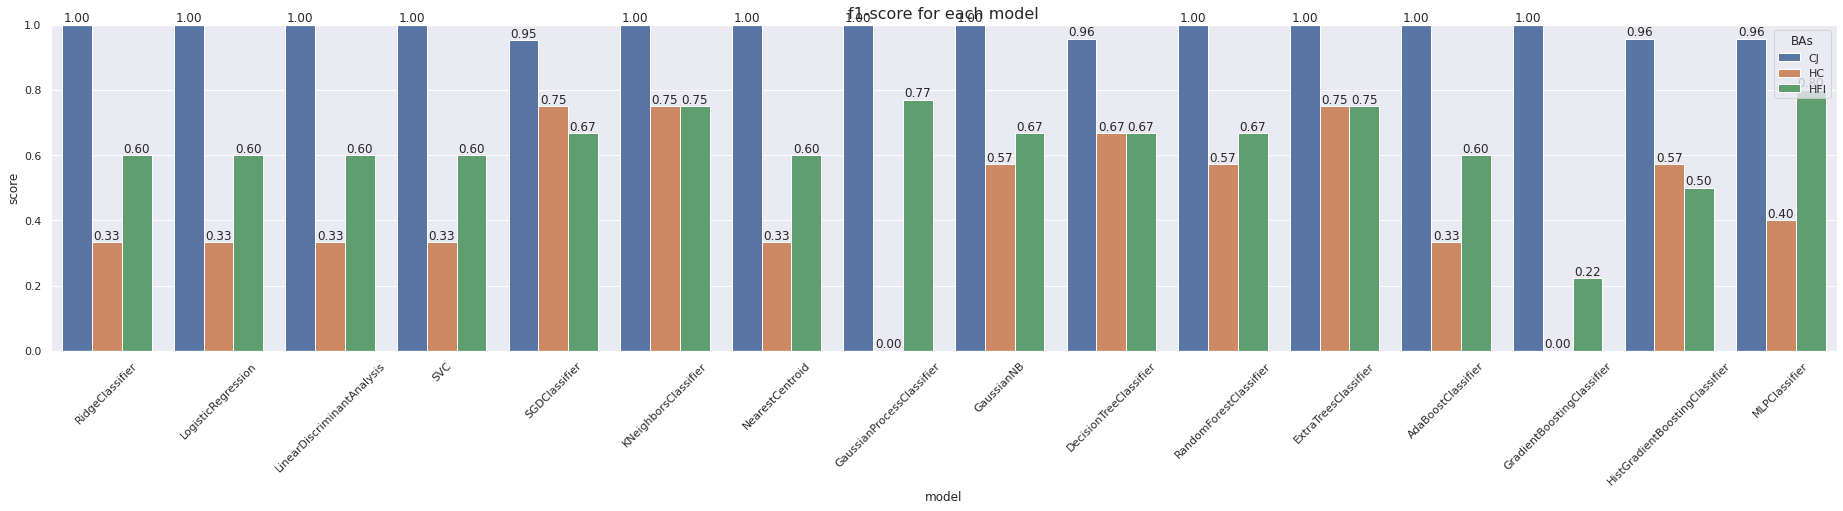


 ######################################################################################################################################################

Time to compute : 00h00m25s

 ######################################################################################################################################################






In [171]:
# Initialise models
RidgeClassifier_ = RidgeClassifier()
LogisticRegression_ = LogisticRegression()
LinearDiscriminantAnalysis_ = LinearDiscriminantAnalysis()
SVC_ = SVC(random_state=0)
SGDClassifier_ = SGDClassifier()
KNeighborsClassifier_ = KNeighborsClassifier()
NearestCentroid_ = NearestCentroid()
GaussianProcessClassifier_ = GaussianProcessClassifier(kernel=1.0 * RBF(1.0))
GaussianNB_ = GaussianNB()
DecisionTreeClassifier_ = DecisionTreeClassifier(random_state=0)
RandomForestClassifier_ = RandomForestClassifier(random_state=0)
ExtraTreesClassifier_ = ExtraTreesClassifier(random_state=0)
AdaBoostClassifier_ = AdaBoostClassifier(random_state=0)
GradientBoostingClassifier_ = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
HistGradientBoostingClassifier_ = HistGradientBoostingClassifier(max_iter=100)
MLPClassifier_ = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=300, random_state=1)


# Create dict with all models
dict_models = {'RidgeClassifier': RidgeClassifier_,
               'LogisticRegression': LogisticRegression_,
               'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis_,
               'SVC': SVC_,
               'SGDClassifier': SGDClassifier_,
               'KNeighborsClassifier': KNeighborsClassifier_,
               'NearestCentroid': NearestCentroid_,
               'GaussianProcessClassifier': GaussianProcessClassifier_,
               'GaussianNB': GaussianNB_,
               'DecisionTreeClassifier': DecisionTreeClassifier_,
               'RandomForestClassifier': RandomForestClassifier_,
               'ExtraTreesClassifier': ExtraTreesClassifier_,
               'AdaBoostClassifier': AdaBoostClassifier_,
               'GradientBoostingClassifier': GradientBoostingClassifier_,
               'HistGradientBoostingClassifier': HistGradientBoostingClassifier_,
               'MLPClassifier': MLPClassifier_
              }


# Launch classification pipeline
df_scores, dict_df_feature_importance = pipeline_classification(X=X_imp_halfmin_log_std_fs_nb_10, y=target,
                                                                dict_models=dict_models, plot_each_model=True, plot_hist_score=True, score='f1-score')

In [172]:
print()

### with <code>X_imp_halfmin_log_std_fs_nb_5</code>

###################################################################################################################################################### 



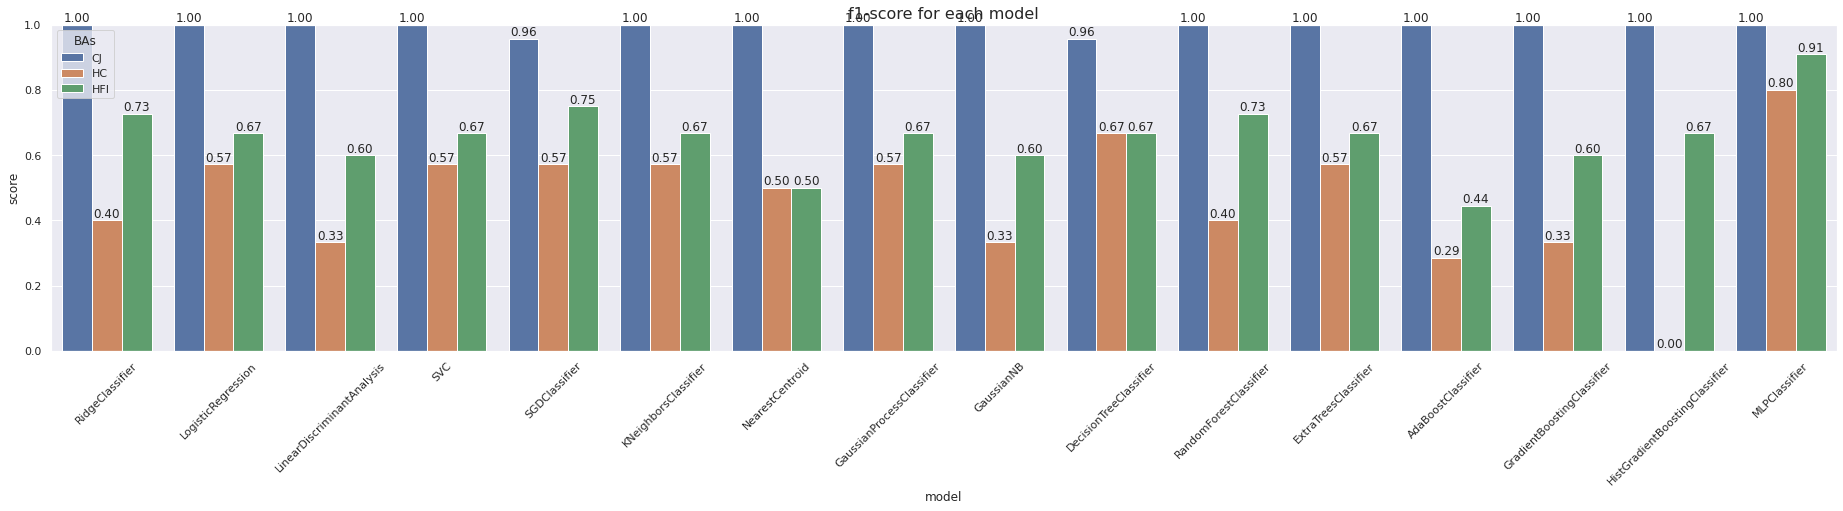


 ######################################################################################################################################################

Time to compute : 00h00m03s

 ######################################################################################################################################################






In [173]:
# Initialise models
RidgeClassifier_ = RidgeClassifier()
LogisticRegression_ = LogisticRegression()
LinearDiscriminantAnalysis_ = LinearDiscriminantAnalysis()
SVC_ = SVC(random_state=0)
SGDClassifier_ = SGDClassifier()
KNeighborsClassifier_ = KNeighborsClassifier()
NearestCentroid_ = NearestCentroid()
GaussianProcessClassifier_ = GaussianProcessClassifier(kernel=1.0 * RBF(1.0))
GaussianNB_ = GaussianNB()
DecisionTreeClassifier_ = DecisionTreeClassifier(random_state=0)
RandomForestClassifier_ = RandomForestClassifier(random_state=0)
ExtraTreesClassifier_ = ExtraTreesClassifier(random_state=0)
AdaBoostClassifier_ = AdaBoostClassifier(random_state=0)
GradientBoostingClassifier_ = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
HistGradientBoostingClassifier_ = HistGradientBoostingClassifier(max_iter=100)
MLPClassifier_ = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=300, random_state=1)


# Create dict with all models
dict_models = {'RidgeClassifier': RidgeClassifier_,
               'LogisticRegression': LogisticRegression_,
               'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis_,
               'SVC': SVC_,
               'SGDClassifier': SGDClassifier_,
               'KNeighborsClassifier': KNeighborsClassifier_,
               'NearestCentroid': NearestCentroid_,
               'GaussianProcessClassifier': GaussianProcessClassifier_,
               'GaussianNB': GaussianNB_,
               'DecisionTreeClassifier': DecisionTreeClassifier_,
               'RandomForestClassifier': RandomForestClassifier_,
               'ExtraTreesClassifier': ExtraTreesClassifier_,
               'AdaBoostClassifier': AdaBoostClassifier_,
               'GradientBoostingClassifier': GradientBoostingClassifier_,
               'HistGradientBoostingClassifier': HistGradientBoostingClassifier_,
               'MLPClassifier': MLPClassifier_
              }


# Launch classification pipeline
df_scores, dict_df_feature_importance = pipeline_classification(X=X_imp_halfmin_log_std_fs_nb_5, y=target,
                                                                dict_models=dict_models, plot_each_model=False, plot_hist_score=True, score='f1-score')

In [174]:
print()

### On the above barplot, we can choose a model and dig into its caracteristics, e.g. *RandomForestClassifier*

In [175]:
df_scores

RidgeClassifier  LogisticRegression  LinearDiscriminantAnalysis  SVC  \
CJ              1.00                1.00                        1.00 1.00   
HC              0.40                0.57                        0.33 0.57   
HFI             0.73                0.67                        0.60 0.67   

     SGDClassifier  KNeighborsClassifier  NearestCentroid  \
CJ            0.96                  1.00             1.00   
HC            0.57                  0.57             0.50   
HFI           0.75                  0.67             0.50   

     GaussianProcessClassifier  GaussianNB  DecisionTreeClassifier  \
CJ                        1.00        1.00                    0.96   
HC                        0.57        0.33                    0.67   
HFI                       0.67        0.60                    0.67   

     RandomForestClassifier  ExtraTreesClassifier  AdaBoostClassifier  \
CJ                     1.00                  1.00                1.00   
HC                     0.40                  0.57                0.29   
HFI                    0.73                  0.67                0.44   

     GradientBoostingClassifier  HistGradientBoostingClassifier  MLPClassifier  
CJ                         1.00                            1.00           1.00  
HC                         0.33                            0.00           0.80  
HFI                        0.60                            0.67           0.91

In [176]:
dict_df_feature_importance['DecisionTreeClassifier']

Feature name  Feature importance score
0       7-DHCA                      0.26
3           CA                      0.05
4          HCA                      0.04
2        NorCA                      0.03
1        b-MCA                      0.01

In [177]:
print()

# 6 - Clustering

In [178]:
from clustering_functions import *

In [179]:
#target = 

## a - Kmeans

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



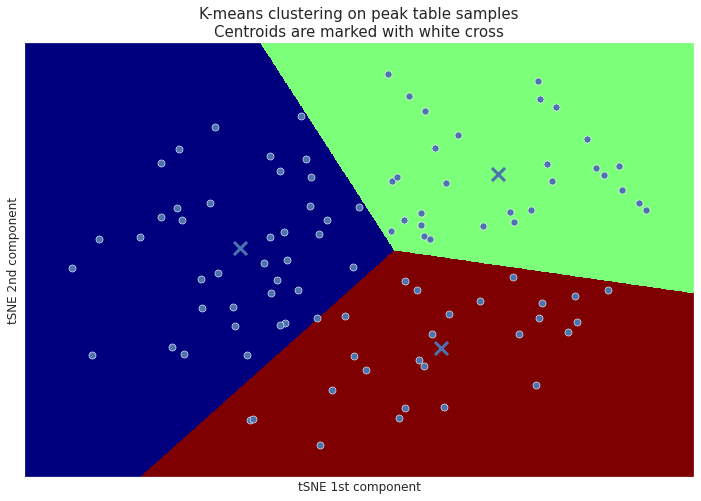

Inertia of k-means model : 590.24


In [180]:
kmeans = perform_kmeans(X_imp_halfmin_log_std_PCA_tSNE.astype('double'), n_clusters=3, col_prefix='tSNE')

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



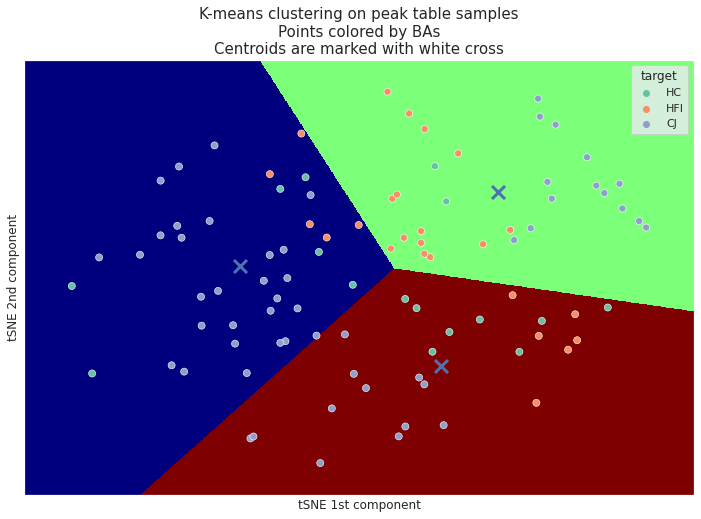

Inertia of k-means model : 590.24
Adjusted rand index of k-means model : 0.069


In [181]:
kmeans = perform_kmeans(X_imp_halfmin_log_std_PCA_tSNE.astype('double'), target=target, n_clusters=3, col_prefix='tSNE')

## b - Affinity propagation

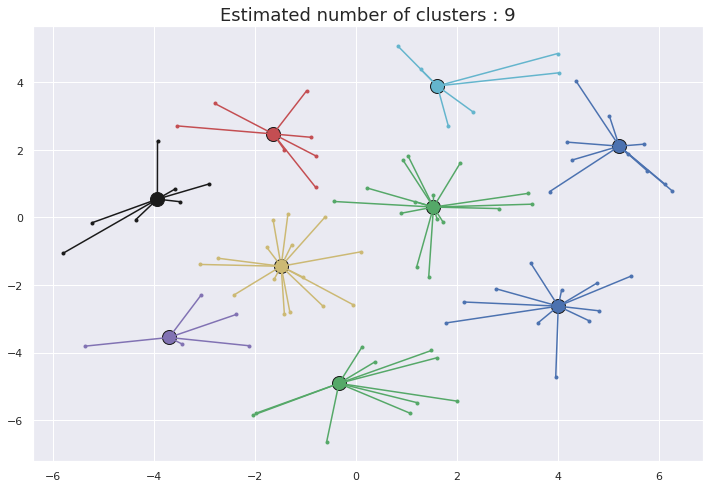

In [182]:
af = perform_affinity_propagation(X_imp_halfmin_log_std_PCA_tSNE)

## c - Hierarchical clustering

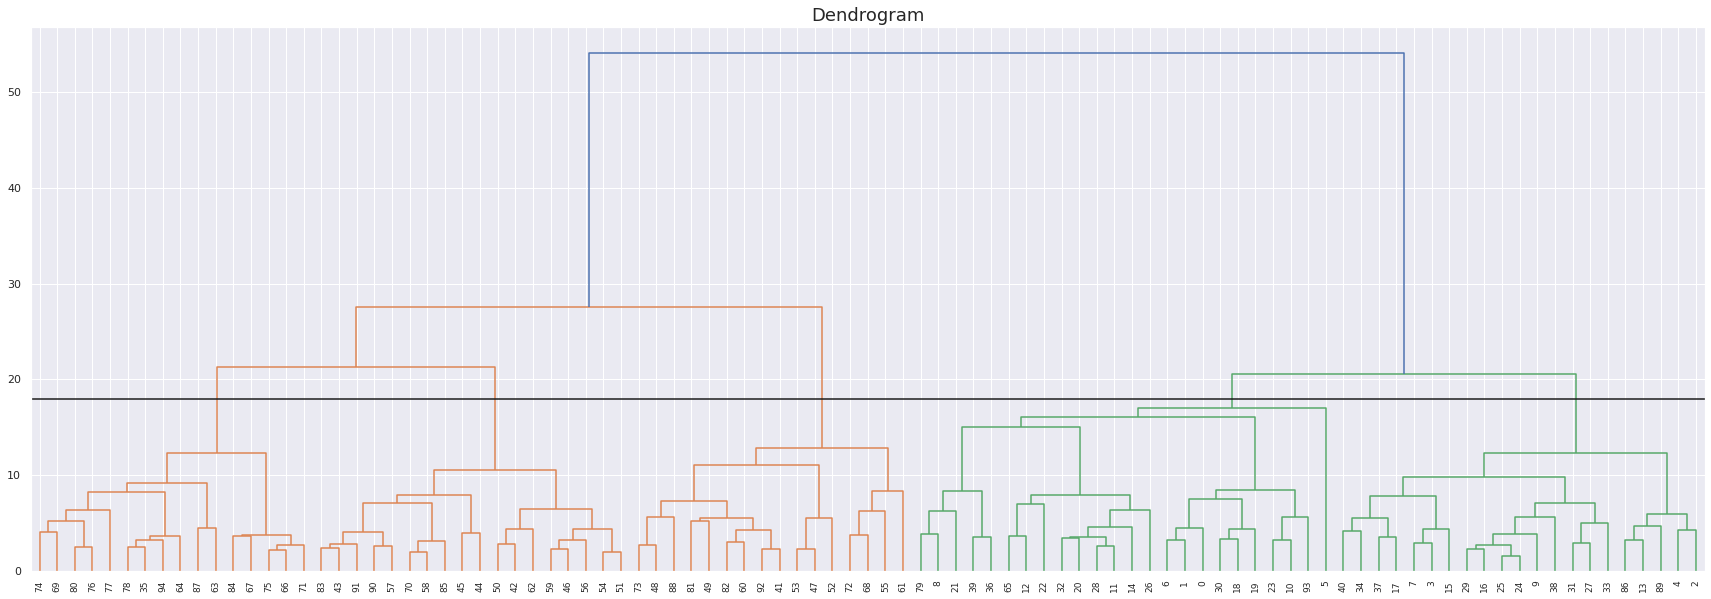

In [183]:
plot_dendrogram(X_imp_halfmin_log_std_PCA, hline=18)

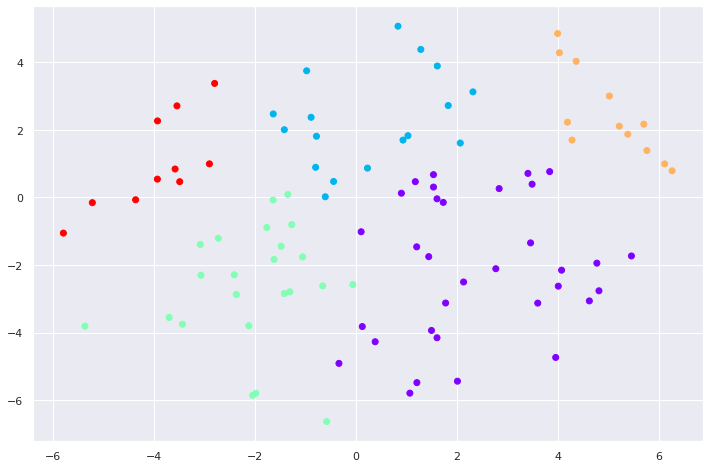

In [184]:
hc = perform_hierarchical_clustering(X_imp_halfmin_log_std_PCA_tSNE, n_clusters=5)

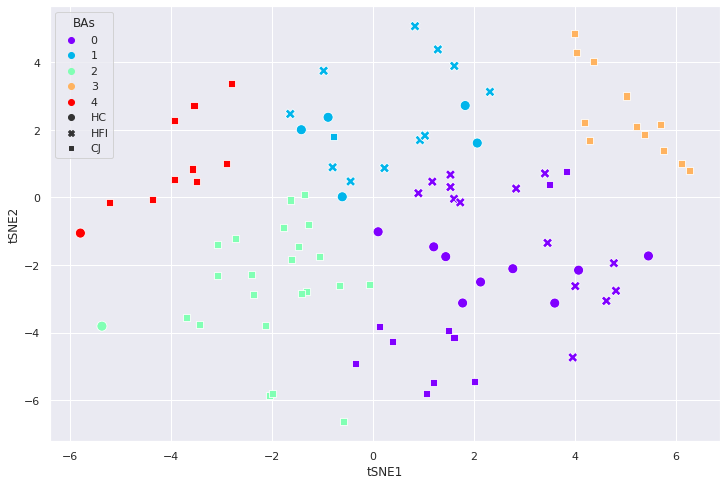

In [193]:
hc = perform_hierarchical_clustering(X_imp_halfmin_log_std_PCA_tSNE, n_clusters=5, target=target)